¡Hola, Guillermo

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Guillermo! Has hecho un excelente trabajo con los ajustes, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 2</b> <a class="tocSkip"></a>

Hola Guillermo! Has hecho un excelente trabajo con los ajustes, agregaste perfectamente la prueba de levene para mostrar el supuesto de varianzas iguales. 

Sigue con el excelente trabajo!
</div>

# PASO 1 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import levene
from scipy.stats import ttest_ind

Importo las librerias que voy a utilizar en el desarrollo del proyecto

In [2]:
df_games = pd.read_csv('/datasets/games.csv', sep=',')


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.




In [3]:
df_games

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      Rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16715 rows x 11 columns]

Realizo la carga inicial de datos

In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# PASO 2

In [5]:
df_games.columns = [col.lower() for col in df_games.columns]
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
df_games.head(5)

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

Cambio a minusculas los encabezados de todas las columnas 

In [7]:
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')

<div class="alert alert-block alert-info">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
En ocasiones podemos completar los valores faltantes con información con proxys. Por ejemplo en este caso los podríamos completar con los años de lanzamientos de los juegos en otras plataformas
</div>

Cambio el tipo de datos de la columna de objeto str a Int64 conservando los valores NAN.

In [8]:
exist_tbd = df_games.isin(['tbd']).any().any()
exist_tbd

True

In [9]:
tbd_rows = df_games[df_games.isin(["tbd"]).any(axis=1)]
tbd_rows

name platform  year_of_release  \
119                               Zumba Fitness      Wii             2010   
301              Namco Museum: 50th Anniversary      PS2             2005   
520                             Zumba Fitness 2      Wii             2011   
645                                uDraw Studio      Wii             2010   
657    Frogger's Adventures: Temple of the Frog      GBA             <NA>   
...                                         ...      ...              ...   
16695                           Planet Monsters      GBA             2001   
16697                          Bust-A-Move 3000       GC             2003   
16698                          Mega Brain Boost       DS             2008   
16704                                  Plushees       DS             2008   
16706             Men in Black II: Alien Escape       GC             2003   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
119        Sports      3.45      2.59       0.0         0.66           NaN   
301          Misc      2.08      1.35       0.0         0.54          61.0   
520        Sports      1.51      1.03       0.0         0.27           NaN   
645          Misc      1.65      0.57       0.0         0.20          71.0   
657     Adventure      2.15      0.18       0.0         0.07          73.0   
...           ...       ...       ...       ...          ...           ...   
16695      Action      0.01      0.00       0.0         0.00          67.0   
16697      Puzzle      0.01      0.00       0.0         0.00          53.0   
16698      Puzzle      0.01      0.00       0.0         0.00          48.0   
16704  Simulation      0.01      0.00       0.0         0.00           NaN   
16706     Shooter      0.01      0.00       0.0         0.00           NaN   

      user_score rating  
119          tbd      E  
301          tbd   E10+  
520          tbd      T  
645          tbd      E  
657          tbd      E  
...          ...    ...  
16695        tbd      E  
16697        tbd      E  
16698        tbd      E  
16704        tbd      E  
16706        tbd      T  

[2424 rows x 11 columns]

Verifico que existen 2424 filas con valores tbd (to be determined)

In [10]:
df_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [11]:
nan_values_name = df_games[df_games['name'].isna()]
nan_values_name

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

In [12]:
nan_values_year_of_release = df_games[df_games['year_of_release'].isna()]
nan_values_year_of_release

name platform  year_of_release  \
183                      Madden NFL 2004      PS2             <NA>   
377                     FIFA Soccer 2004      PS2             <NA>   
456           LEGO Batman: The Videogame      Wii             <NA>   
475           wwe Smackdown vs. Raw 2006      PS2             <NA>   
609                       Space Invaders     2600             <NA>   
...                                  ...      ...              ...   
16373  PDC World Championship Darts 2008      PSP             <NA>   
16405                      Freaky Flyers       GC             <NA>   
16448                          Inversion       PC             <NA>   
16458        Hakuouki: Shinsengumi Kitan      PS3             <NA>   
16522                       Virtua Quest       GC             <NA>   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          Sports      4.26      0.26      0.01         0.71          94.0   
377          Sports      0.59      2.36      0.04         0.51          84.0   
456          Action      1.80      0.97      0.00         0.29          74.0   
475        Fighting      1.57      1.02      0.00         0.41           NaN   
609         Shooter      2.36      0.14      0.00         0.03           NaN   
...             ...       ...       ...       ...          ...           ...   
16373        Sports      0.01      0.00      0.00         0.00          43.0   
16405        Racing      0.01      0.00      0.00         0.00          69.0   
16448       Shooter      0.01      0.00      0.00         0.00          59.0   
16458     Adventure      0.01      0.00      0.00         0.00           NaN   
16522  Role-Playing      0.01      0.00      0.00         0.00          55.0   

      user_score rating  
183          8.5      E  
377          6.4      E  
456          7.9   E10+  
475          NaN    NaN  
609          NaN    NaN  
...          ...    ...  
16373        tbd   E10+  
16405        6.5      T  
16448        6.7      M  
16458        NaN    NaN  
16522        5.5      T  

[269 rows x 11 columns]

In [13]:
nan_values_rating = df_games[df_games['rating'].isna()]
nan_values_rating

name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
1         29.08      3.58      6.81         0.77           NaN        NaN   
4         11.27      8.89     10.22         1.00           NaN        NaN   
5         23.20      2.26      4.22         0.58           NaN        NaN   
9         26.93      0.63      0.28         0.47           NaN        NaN   
10         9.05     10.95      1.93         2.74           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      rating  
1        NaN  
4        NaN  
5        NaN  
9        NaN  
10       NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[6766 rows x 11 columns]

In [14]:
df_games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [15]:
# Reemplazar "K-A" por "E" en la columna 'rating'
df_games['rating'] = df_games['rating'].replace('K-A', 'E')

In [16]:
df_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
# Crear la tabla dinámica con 'platform' como índice de filas y 'year_of_release' como columnas
pivot_table = df_games.pivot_table(
    index='year_of_release',            # Fila: platform
    columns='platform',                 # Columna: genero
    aggfunc='size',                     # Función de agregación: cuenta las ocurrencias
    
    )

# Configurar para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)     # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas

print(pivot_table)


platform         2600  3DO    3DS    DC     DS    GB    GBA     GC   GEN   GG  \
year_of_release                                                                 
1980              9.0  NaN    NaN   NaN    NaN   NaN    NaN    NaN   NaN  NaN   
1981             46.0  NaN    NaN   NaN    NaN   NaN    NaN    NaN   NaN  NaN   
1982             36.0  NaN    NaN   NaN    NaN   NaN    NaN    NaN   NaN  NaN   
1983             11.0  NaN    NaN   NaN    NaN   NaN    NaN    NaN   NaN  NaN   
1984              1.0  NaN    NaN   NaN    NaN   NaN    NaN    NaN   NaN  NaN   
1985              1.0  NaN    NaN   NaN    1.0   NaN    NaN    NaN   NaN  NaN   
1986              2.0  NaN    NaN   NaN    NaN   NaN    NaN    NaN   NaN  NaN   
1987              6.0  NaN    NaN   NaN    NaN   NaN    NaN    NaN   NaN  NaN   
1988              2.0  NaN    NaN   NaN    NaN   1.0    NaN    NaN   NaN  NaN   
1989              2.0  NaN    NaN   NaN    NaN  10.0    NaN    NaN   NaN  NaN   
1990              NaN  NaN  

In [18]:
# Filtrar por rating 


# Crear la tabla dinámica con 'genre' como índice de filas y 'rating' como columnas
pivot_table = df_games.pivot_table(
    index='genre',            # Fila: genre
    columns='rating',         # Columna: rating
    aggfunc='size',           # Función de agregación: cuenta las ocurrencias
    )

# Configurar para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)     # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas

print(pivot_table)

rating         AO       E   E10+   EC      M   RP      T
genre                                                   
Action        1.0   416.0  481.0  1.0  608.0  NaN  681.0
Adventure     NaN   162.0   68.0  2.0   99.0  NaN  115.0
Fighting      NaN     8.0   19.0  NaN   49.0  NaN  362.0
Misc          NaN   458.0  167.0  5.0   13.0  NaN  239.0
Platform      NaN   358.0  144.0  NaN    3.0  NaN   64.0
Puzzle        NaN   289.0   43.0  NaN    NaN  NaN   10.0
Racing        NaN   585.0   96.0  NaN   18.0  1.0  172.0
Role-Playing  NaN    84.0  111.0  NaN  162.0  NaN  420.0
Shooter       NaN    48.0   58.0  NaN  565.0  NaN  348.0
Simulation    NaN   325.0   48.0  NaN    5.0  NaN  190.0
Sports        NaN  1188.0  107.0  NaN   16.0  NaN  198.0
Strategy      NaN    72.0   78.0  NaN   25.0  2.0  162.0


In [19]:
# Filtrar por rating 


# Crear la tabla dinámica con 'genre' como índice de filas y 'rating' como columnas
pivot_table = df_games.pivot_table(
    index='rating',            # Fila: rting
    columns='platform',         # Columna: platform
    aggfunc='size',           # Función de agregación: cuenta las ocurrencias
    )

# Configurar para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)     # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas

print(pivot_table)

platform   3DS    DC     DS    GBA     GC     PC     PS    PS2    PS3   PS4  \
rating                                                                        
AO         NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
E         92.0   3.0  876.0  426.0  230.0  140.0  117.0  556.0  211.0  54.0   
E10+      76.0   NaN  259.0   25.0   31.0   76.0    NaN  125.0  140.0  40.0   
EC         NaN   NaN    2.0    NaN    1.0    2.0    NaN    1.0    NaN   NaN   
M         12.0   1.0   10.0    7.0   38.0  256.0   20.0  223.0  265.0  76.0   
RP         NaN   NaN    NaN    NaN    NaN    3.0    NaN    NaN    NaN   NaN   
T         48.0  10.0  126.0   64.0  169.0  297.0   71.0  576.0  336.0  85.0   

platform    PSP   PSV    Wii  WiiU   X360     XB  XOne  
rating                                                  
AO          NaN   NaN    NaN   NaN    NaN    1.0   NaN  
E         188.0  22.0  503.0  35.0  247.0  248.0  45.0  
E10+      106.0  28.0  242.0  42.0  168.0   31.0  31.0  
EC 

In [20]:
mean_critic_score = df_games['critic_score'].mean()
mean_critic_score

68.96767850559173

In [21]:
median_critic_score = df_games['critic_score'].median()
median_critic_score

71.0

In [22]:
# Reemplazar 'tbd' por 0 en la columna 'user_score'
df_games['user_score'] = df_games['user_score'].replace('tbd', 0)

# Convertir la columna a numérica (los valores '0' ahora son numéricos)
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

In [23]:
mean_user_score = df_games['user_score'].mean()
mean_user_score

5.40034951068504

In [24]:
median_user_score = df_games['user_score'].median()
median_user_score

6.9

In [25]:
max_critic_score = df_games['critic_score'].max()
max_critic_score

98.0

In [26]:
min_critic_score = df_games['critic_score'].min()
min_critic_score

13.0

In [27]:
max_user_score = df_games['user_score'].max()
max_user_score

9.7

In [28]:
min_user_score = df_games['user_score'].min()
min_user_score

0.0

Verifico que la mediana es mayor que el promedio en las columnas user_score y critic_score y por esta razon la distribucion esta sesgada a la derecha por lo que defino rellenar los valores ausentes NAN con la mediana para evitar una distorsion en los datos. Para rellenar los valores ausentes NAN en la columna rating lo realizo basandome en la relacion que tiene cada genero con el rating ya que realice otra estrategia que es relacionar rating con cada plataforma pero pienso que es mas general y me distorsionaria los datos como se puede observar en los dos tabalas dinamicas que se muestran arriba. Para los valores ausentes NAN en la columna year_of_release los reemplazo por UNKNOWN y cambio el tipo de datos a Int64 para que la columna sea numerica respetando los valores UNKNOWN. Finalmente cambio el tipo de datos de la columna user_score a int64 despues de reemplazar los valores ausentes NAN por la mediana. 

In [29]:
# Crear una copia del DataFrame original
df_games_original = df_games.copy()

# Convertir todas las columnas de df_games a mayúsculas
df_games_upper = df_games.apply(lambda x: x.astype(str).str.upper())

# Verificar duplicados en el DataFrame en mayúsculas
duplicates = df_games_upper[df_games_upper.duplicated()]
print(f"Total de filas duplicadas: {duplicates.shape[0]}")
print(duplicates)

# Volver al DataFrame original si es necesario
df_games = df_games_original.copy()

# Ahora df_games tiene el estado original antes de aplicar las mayúsculas
print(df_games.head())

Total de filas duplicadas: 0
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45          76.0         8.0      E  
1      3.58      6.81         0.77           NaN         NaN    NaN  
2     12.76      3.79         3.29          82.0         8.3      E  
3     10.93      3.28         2.95          80.0   

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Como aprendiste en cursos anteriores, el análisis de duplicados es muy útil para asegurar que nuestros resultados no estarán sesgados



Verifico que no existan filas duplicadas cambiando a mayusculas y creo una copia del df_games original.

In [30]:
# Convertir la columna 'year_of_release' a tipo object
df_games['year_of_release'] = df_games['year_of_release'].astype(object)

# Rellenar los valores NaN con "Does not apply"
df_games['year_of_release'].fillna('Does not apply', inplace=True)

# Verificar que los valores ausentes fueron reemplazados
print(df_games['year_of_release'].isna().sum())  # Debe mostrar 0
print(df_games['year_of_release'].head())  # Muestra los primeros valores para confirmar

0
0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: object


Reemplazo los valores ausentes NAN por Unknown

In [31]:
# Calcular la mediana de la columna 'critic_score'
median_critic_score = df_games['critic_score'].median()

# Reemplazar los valores NaN en 'critic_score' con la mediana
df_games['critic_score'].fillna(median_critic_score, inplace=True)

# Verificar que no queden valores ausentes
print(df_games['critic_score'].isna().sum())  # Debe mostrar 0 si todos los NaN fueron reemplazados

print("\nReplace NAN Values with the Median:")
print(df_games['critic_score'].head())  # Muestra los primeros valores para confirmar

0

Replace NAN Values with the Median:
0    76.0
1    71.0
2    82.0
3    80.0
4    71.0
Name: critic_score, dtype: float64


Reemplazo los valores ausentes NAN por la mediana.

In [32]:
# Calcular la mediana de la columna 'user_score'
median_user_score = df_games['user_score'].median()

# Reemplazar los valores NaN en 'critic_score' con la mediana
df_games['user_score'].fillna(median_user_score, inplace=True)

# Verificar que no queden valores ausentes
print(df_games['user_score'].isna().sum())  # Debe mostrar 0 si todos los NaN fueron reemplazados

print("\nReplace NAN Values with the Median:")
print(df_games['user_score'].head())  # Muestra los primeros valores para confirmar

0

Replace NAN Values with the Median:
0    8.0
1    6.9
2    8.3
3    8.0
4    6.9
Name: user_score, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Excelente trabajo completando esto valores con la mediana para no sesgar nuestros resultados

Reemplazo los valores ausentes NAN por la mediana.

In [33]:
df_games = df_games.dropna(subset=['name'])
df_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64

In [34]:
# Filtrar solo las filas donde la columna 'rating' tiene valores NaN
df_nan = df_games[df_games['rating'].isna()]

# Agrupar por la columna 'genre' y contar los valores NaN en 'rating' por cada género
resultado = df_nan.groupby('genre').size()

# Mostrar el resultado
print("\nCount of NAN Values in Rating by Genre:")
print(resultado)


Count of NAN Values in Rating by Genre:
genre
Action          1181
Adventure        857
Fighting         411
Misc             868
Platform         319
Puzzle           238
Racing           377
Role-Playing     721
Shooter          304
Simulation       305
Sports           839
Strategy         344
dtype: int64


In [35]:
# Filtrar el DataFrame para obtener solo las filas donde 'rating' es NaN
df_nan_rating = df_games[df_games['rating'].isna()]

# Agrupar por 'genre' y calcular el valor máximo de ventas en cada columna de ventas
total_nan_sales_by_genre = df_nan_rating.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Renombrar solo las columnas 5 a 8 sin afectar las columnas 1 a 4
total_nan_sales_by_genre.rename(columns={
    total_nan_sales_by_genre.columns[0]: 'nan_na_sales',      # Columna en posición 5
    total_nan_sales_by_genre.columns[1]: 'nan_eu_sales',      # Columna en posición 6
    total_nan_sales_by_genre.columns[2]: 'nan_jp_sales',      # Columna en posición 7
    total_nan_sales_by_genre.columns[3]: 'nan_other_sales'    # Columna en posición 8
}, inplace=True)

# Mostrar el resultado
print("\nTotal NAN Sales by Genre:")
print(total_nan_sales_by_genre)


Total NAN Sales by Genre:
              nan_na_sales  nan_eu_sales  nan_jp_sales  nan_other_sales
genre                                                                  
Action              198.95         88.06         80.59            21.83
Adventure            34.85         23.69         43.04             4.43
Fighting             80.87         36.92         59.14             9.61
Misc                101.40         65.62         74.16            20.92
Platform            228.23         80.64         87.51            15.78
Puzzle               67.83         16.93         41.42             3.59
Racing              100.86         59.14         28.60            12.60
Role-Playing        106.21         66.71        229.11            18.03
Shooter             123.77         44.74         19.61            12.52
Simulation           42.31         28.38         35.62             6.88
Sports              128.36         85.77         97.96            21.34
Strategy             27.04         16

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 
    
   



Verifico el total de ventas de los valores NAN por cada genero en cada region

In [36]:
total_sales_by_genre =  df_games.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

print("\nTotal Sales by Genre:")
print(total_sales_by_genre)


Total Sales by Genre:
              na_sales  eu_sales  jp_sales  other_sales
genre                                                  
Action          879.01    519.13    161.43       184.60
Adventure       105.26     63.54     52.30        16.49
Fighting        223.36    100.33     87.48        36.36
Misc            407.27    212.74    108.11        74.39
Platform        445.50    200.35    130.83        51.09
Puzzle          122.87     50.01     57.31        12.38
Racing          359.35    236.51     56.71        76.10
Role-Playing    330.81    188.71    355.41        59.63
Shooter         592.24    317.34     38.76       104.11
Simulation      181.92    113.52     63.80        30.73
Sports          684.43    376.79    135.54       134.51
Strategy         68.55     45.17     49.66        10.85


In [37]:
total_sales_concatenated = pd.concat([total_sales_by_genre, total_nan_sales_by_genre], axis=1)

# Crear una lista con los géneros
genres = ['Action', 
          'Adventure',
          'Fighting',
          'Misc',
          'Platform',
          'Puzzle',
          'Racing',
          'Role_playing',
          'Shooter',
          'Simulation',
          'Sports',
          'Strategy']  # Cambia esto por tus propios datos

# Agregar la lista como una nueva columna
total_sales_concatenated['genre'] = genres

total_sales_concatenated

na_sales  eu_sales  jp_sales  other_sales  nan_na_sales  \
genre                                                                   
Action          879.01    519.13    161.43       184.60        198.95   
Adventure       105.26     63.54     52.30        16.49         34.85   
Fighting        223.36    100.33     87.48        36.36         80.87   
Misc            407.27    212.74    108.11        74.39        101.40   
Platform        445.50    200.35    130.83        51.09        228.23   
Puzzle          122.87     50.01     57.31        12.38         67.83   
Racing          359.35    236.51     56.71        76.10        100.86   
Role-Playing    330.81    188.71    355.41        59.63        106.21   
Shooter         592.24    317.34     38.76       104.11        123.77   
Simulation      181.92    113.52     63.80        30.73         42.31   
Sports          684.43    376.79    135.54       134.51        128.36   
Strategy         68.55     45.17     49.66        10.85         27.04   

              nan_eu_sales  nan_jp_sales  nan_other_sales         genre  
genre                                                                    
Action               88.06         80.59            21.83        Action  
Adventure            23.69         43.04             4.43     Adventure  
Fighting             36.92         59.14             9.61      Fighting  
Misc                 65.62         74.16            20.92          Misc  
Platform             80.64         87.51            15.78      Platform  
Puzzle               16.93         41.42             3.59        Puzzle  
Racing               59.14         28.60            12.60        Racing  
Role-Playing         66.71        229.11            18.03  Role_playing  
Shooter              44.74         19.61            12.52       Shooter  
Simulation           28.38         35.62             6.88    Simulation  
Sports               85.77         97.96            21.34        Sports  
Strategy             16.70         45.17             3.47      Strategy

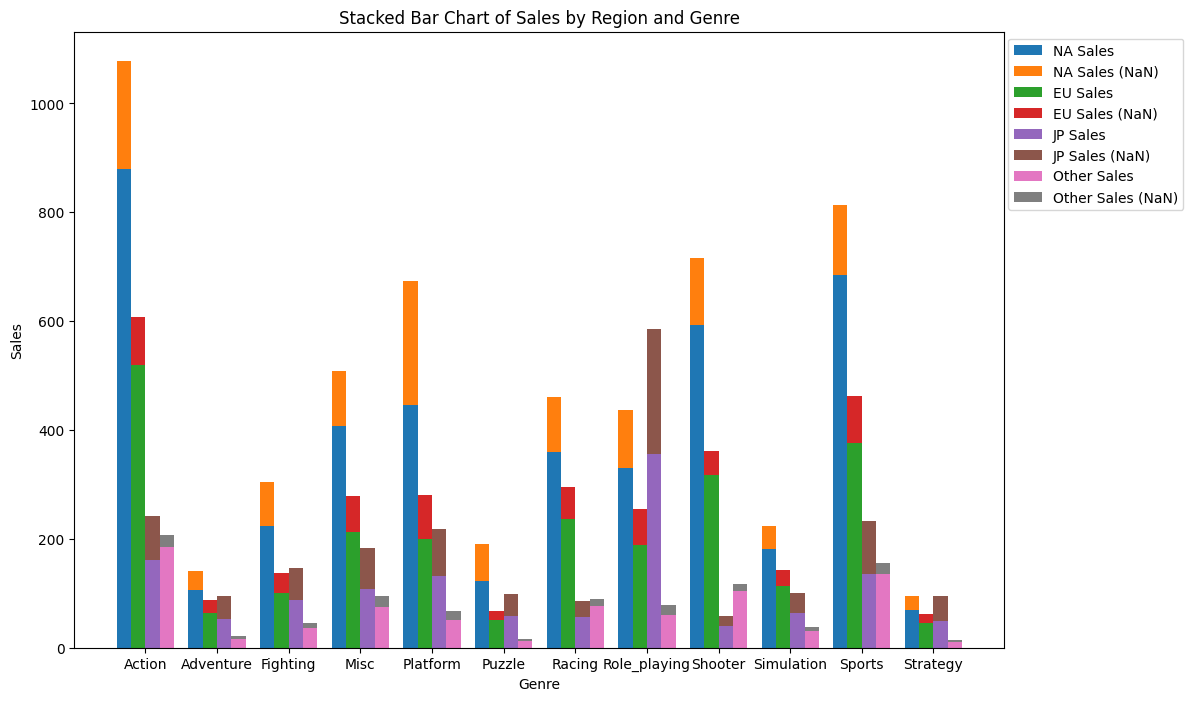

In [38]:
# Definir posiciones de x y el ancho de las barras
x = np.arange(len(total_sales_concatenated['genre']))  # Posiciones en el eje x para cada género
width = 0.2  # Ancho de cada grupo de barras

# Crear el gráfico de barras apilado
fig, ax = plt.subplots(figsize=(12, 8))

# Gráfico de cada región y sus valores NaN correspondientes usando el DataFrame
ax.bar(x - 1.5*width, total_sales_concatenated['na_sales'], width, label='NA Sales')
ax.bar(x - 1.5*width, total_sales_concatenated['nan_na_sales'], width, 
       bottom=total_sales_concatenated['na_sales'], label='NA Sales (NaN)')

ax.bar(x - 0.5*width, total_sales_concatenated['eu_sales'], width, label='EU Sales')
ax.bar(x - 0.5*width, total_sales_concatenated['nan_eu_sales'], width, 
       bottom=total_sales_concatenated['eu_sales'], label='EU Sales (NaN)')

ax.bar(x + 0.5*width, total_sales_concatenated['jp_sales'], width, label='JP Sales')
ax.bar(x + 0.5*width, total_sales_concatenated['nan_jp_sales'], width, 
       bottom=total_sales_concatenated['jp_sales'], label='JP Sales (NaN)')

ax.bar(x + 1.5*width, total_sales_concatenated['other_sales'], width, label='Other Sales')
ax.bar(x + 1.5*width, total_sales_concatenated['nan_other_sales'], width, 
       bottom=total_sales_concatenated['other_sales'], label='Other Sales (NaN)')

# Configuración del gráfico
ax.set_xlabel('Genre')
ax.set_ylabel('Sales')
ax.set_title('Stacked Bar Chart of Sales by Region and Genre')
ax.set_xticks(x)
ax.set_xticklabels(total_sales_concatenated['genre'])
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))  # Colocar leyenda fuera del gráfico para mayor claridad

# Mostrar el gráfico
plt.show()

Comparo con el total de ventas por region y es relevante el porcentaje para cada gnero las ventas con valores NAN. Para realizar este grafico me ayude con CHATGPT

In [39]:
df_games.fillna("Unknown", inplace=True)

In [40]:
df_games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Reemplazo los valores ausentes NAN de la columna rating con Unknown pues no hay informacion disponible para poder identificar a que categoria corresponden y al ser en cantidad y dolares un porcentaje representativo del total no se los puede eliminar. íenso que los valores estaban ausentes porque al revisar todos tenian ventas muy bajas y otros casos no tenian ventas y supongo que por ese motivo no tenian calificacion en user_score ni en critic_score y consecuencia de eso tempoco tenian asignado una categoria de ESRB. 

In [41]:
# Crear la nueva columna 'total_sales' sumando las ventas de todas las regiones
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Mostrar las primeras filas para verificar
df_games.head(10)

name platform year_of_release         genre  na_sales  \
0                 Wii Sports      Wii            2006        Sports     41.36   
1          Super Mario Bros.      NES            1985      Platform     29.08   
2             Mario Kart Wii      Wii            2008        Racing     15.68   
3          Wii Sports Resort      Wii            2009        Sports     15.61   
4   Pokemon Red/Pokemon Blue       GB            1996  Role-Playing     11.27   
5                     Tetris       GB            1989        Puzzle     23.20   
6      New Super Mario Bros.       DS            2006      Platform     11.28   
7                   Wii Play      Wii            2006          Misc     13.96   
8  New Super Mario Bros. Wii      Wii            2009      Platform     14.44   
9                  Duck Hunt      NES            1984       Shooter     26.93   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0         8.0        E   
1      3.58      6.81         0.77          71.0         6.9  Unknown   
2     12.76      3.79         3.29          82.0         8.3        E   
3     10.93      3.28         2.95          80.0         8.0        E   
4      8.89     10.22         1.00          71.0         6.9  Unknown   
5      2.26      4.22         0.58          71.0         6.9  Unknown   
6      9.14      6.50         2.88          89.0         8.5        E   
7      9.18      2.93         2.84          58.0         6.6        E   
8      6.94      4.70         2.24          87.0         8.4        E   
9      0.63      0.28         0.47          71.0         6.9  Unknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38  
5        30.26  
6        29.80  
7        28.91  
8        28.32  
9        28.31

# PASO 3

In [42]:
# Crear una copia de df_games para realizar las modificaciones
df_games_copy = df_games.copy()

# Convertir 'year_of_release' a numérico en la copia, manejando errores
df_games_copy['year_of_release'] = pd.to_numeric(df_games_copy['year_of_release'], errors='coerce')

# Eliminar filas con NaN en 'year_of_release' en la copia
df_games_copy.dropna(subset=['year_of_release'], inplace=True)

# Contar el número de juegos lanzados cada año en la copia y ordenar por año
games_per_year = df_games_copy['year_of_release'].value_counts().sort_index()

# Mostrar la cantidad de lanzamientos por año
print("\nNumber of Games Released by Year:")
print(games_per_year)

# Crear el gráfico de barras para visualizar los lanzamientos por año
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games Released')
plt.title('Number of Games Released by Year')
plt.show()


Number of Games Released by Year:
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64


<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo con el desarrollo de la gráfica, esta gráfica nos ayuda a entender también sobre el comportamiento del mercado de videojuegos en el tiempo
</div>

Se puede ver que a partir de 1994 hay un incremento importante y piesno que se debe a NINTENDO y de ahi coincide los incrementos considerables con el lanzamiento de NINTENDO WII y de PLAYSTATION y el decrecimiento a parttir del 2012 se debe comprobar con un analisis mas detallado. Se crea un df_games_copy porque se elimina los valores que no tienen año de lanzamiento.

In [43]:
# Calcular ventas totales por plataforma
platform_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Seleccionar las plataformas con las ventas más altas
top_platforms = platform_sales.head(10).index
print("Platforms with the highest total sales:\n", platform_sales.head(10))

Platforms with the highest total sales:
 platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


In [44]:
# Calcular ventas totales por plataforma
platform_sales_copy = df_games_copy.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Seleccionar las plataformas con las ventas más altas
top_platforms_copy = platform_sales_copy.head(10).index
print("Platforms with the highest total sales:\n", platform_sales_copy.head(10))

Platforms with the highest total sales:
 platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64


Estas son las 10 plataformas mas vendidas desde 1980 hasta 2016. Se realiza el calculo con el df_games original y con df_games_copy para ver que tanto es la variacion en la consistencia de los datos.


Annual Sales Distribution for Top Platforms:
platform             DS    GBA     PC      PS     PS2     PS3     PS4    PSP  \
year_of_release                                                                
1985               0.02   0.00   0.04    0.00    0.00    0.00    0.00   0.00   
1988               0.00   0.00   0.03    0.00    0.00    0.00    0.00   0.00   
1992               0.00   0.00   3.03    0.00    0.00    0.00    0.00   0.00   
1994               0.00   0.00  12.87    6.03    0.00    0.00    0.00   0.00   
1995               0.00   0.00   4.22   35.96    0.00    0.00    0.00   0.00   
1996               0.00   0.00  10.58   94.70    0.00    0.00    0.00   0.00   
1997               0.00   0.00  11.27  136.17    0.00    0.00    0.00   0.00   
1998               0.00   0.00   3.26  169.49    0.00    0.00    0.00   0.00   
1999               0.00   0.00   4.74  144.53    0.00    0.00    0.00   0.00   
2000               0.00   0.07   4.66   96.37   39.17    0.00    0.00   0.

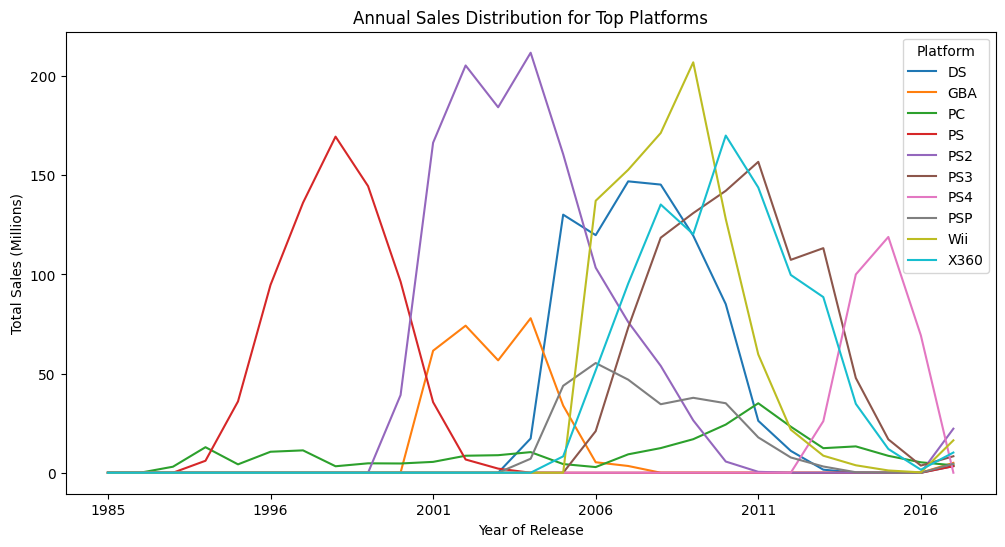

In [45]:
# Filtrar los datos para incluir solo las plataformas más vendidas
top_platforms_data = df_games[df_games['platform'].isin(top_platforms)]

# Agrupar por año y plataforma para obtener las ventas anuales
annual_sales_by_platform = top_platforms_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
annual_sales_by_platform.fillna(0, inplace=True)

print("\nAnnual Sales Distribution for Top Platforms:")
print(annual_sales_by_platform)

# Crear gráfico de líneas para visualizar las ventas anuales por plataforma
annual_sales_by_platform.plot(kind='line', figsize=(12, 6))
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (Millions)')
plt.title('Annual Sales Distribution for Top Platforms')
plt.legend(title='Platform')
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el desarrollo de la gráfica. Solamente te recomendaría que intentes reducir el periodo dado que el perido actual puede resultar muy extenso. Recordemos que con base en la información la popularidad la alcanzan en los primeros años. Es por ello que con un periodo largo puede no ser posible analizar de forma clara las plataformas y videojuegos actualizados y podrías estar analizando los desactualizados. Es por ello y dado que buscamos responder qué vender en 2017 te recomendareia gráficar un periodo que no supere los 5 años. POR ESO EN ESTE PUNTO REALICE UNA COPIA DEL DATA FRAME ORIGINAL df_games A df_games_copy PARA REALIZAR LOS CALCULOS Y GRAFICAR UN PERIODO DE 8 AÑOS QUE ES EL QUE DETERMINE APROPIADO TOMANDO EN CUENTA LOS PRIMEROS AÑOS DE LANZAMIENTO EN LAS PLATAFORMAS CON MAS VENTAS QUE SE MUESTRA EN EL SIGUIENTE GRAFICO. ESTE GRAFICO DE TODOS LOS AÑOS FUE SOLO PARA MOSTRAR LA TENDENCIA QUE TIENEN LAS PLATAFORMAS CUANDO SON LOS PRIMEROS AÑOS DE LANZAMIENTO QUE SE REPITEN CADA 8 AÑOS.    

    PD: ES NECESARIO QUE AJUSTE A 5 AÑOS EN MI DATAFRAME ORIGINAL Y TAMBIEN EN LA COPIA ?

</div>



<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola, Guillermo! No, solamente lo ajustamos directamente en la gráfica, no es necesario hacerlo sobre el dataframe original


In [46]:
# Filtrar los datos para incluir solo las plataformas más vendidas
top_platforms_data_copy = df_games_copy[df_games_copy['platform'].isin(top_platforms_copy)]

# Agrupar por año y plataforma para obtener las ventas anuales
annual_sales_by_platform_copy = top_platforms_data_copy.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
annual_sales_by_platform_copy.fillna(0, inplace=True)

print("\nAnnual Sales Distribution for Top Platforms:")
print(annual_sales_by_platform_copy)

# Crear gráfico de líneas para visualizar las ventas anuales por plataforma
annual_sales_by_platform_copy.plot(kind='line', figsize=(12, 6))
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (Millions)')
plt.title('Annual Sales Distribution for Top Platforms')
plt.legend(title='Platform')
plt.show()


Annual Sales Distribution for Top Platforms:
platform           3DS      DS    GBA      PS     PS2     PS3     PS4    PSP  \
year_of_release                                                                
1985.0            0.00    0.02   0.00    0.00    0.00    0.00    0.00   0.00   
1994.0            0.00    0.00   0.00    6.03    0.00    0.00    0.00   0.00   
1995.0            0.00    0.00   0.00   35.96    0.00    0.00    0.00   0.00   
1996.0            0.00    0.00   0.00   94.70    0.00    0.00    0.00   0.00   
1997.0            0.00    0.00   0.00  136.17    0.00    0.00    0.00   0.00   
1998.0            0.00    0.00   0.00  169.49    0.00    0.00    0.00   0.00   
1999.0            0.00    0.00   0.00  144.53    0.00    0.00    0.00   0.00   
2000.0            0.00    0.00   0.07   96.37   39.17    0.00    0.00   0.00   
2001.0            0.00    0.00  61.53   35.59  166.43    0.00    0.00   0.00   
2002.0            0.00    0.00  74.16    6.67  205.38    0.00    0.00   0.

Esta es una distribucion de las 10 pkataformas mas vendidas. Se realiza el calculo con el df_games original y con df_games_copy para ver que tanto es la variacion en la consistencia de los datos y el cambio es importante porque la informacion no muestra resultados desde 10980 hasta 1994 teniendo un cambio en las plataformas mas vendidas.

In [47]:
# Encontrar el último año con ventas para cada plataforma
last_sales_year_copy = df_games_copy.groupby('platform')['year_of_release'].max()

# Filtrar plataformas que no tienen ventas recientes 
inactive_platforms_copy = last_sales_year_copy[last_sales_year_copy < 2016]  # Ajusta el año según los datos es el 2016
print("Platforms that no longer have recent sales :\n", inactive_platforms_copy)

Platforms that no longer have recent sales :
 platform
2600    1989.0
3DO     1995.0
DC      2008.0
DS      2013.0
GB      2001.0
GBA     2007.0
GC      2007.0
GEN     1994.0
GG      1992.0
N64     2002.0
NES     1994.0
NG      1996.0
PCFX    1996.0
PS      2003.0
PS2     2011.0
PSP     2015.0
SAT     1999.0
SCD     1994.0
SNES    1999.0
TG16    1995.0
WS      2001.0
XB      2008.0
Name: year_of_release, dtype: float64


Estas son las plataformas que dejaron de ser populares y ya no registran ventas, se indica el ultimo año que tuvieron ventas. Para este caso solo se analizo el df_games_copy.

Active duration of each platform (in years):
              min     max  duration
platform                          
PC        1985.0  2016.0      31.0
DS        1985.0  2013.0      28.0
GB        1988.0  2001.0      13.0
X360      2005.0  2016.0      11.0
PSP       2004.0  2015.0      11.0
PS2       2000.0  2011.0      11.0
NES       1983.0  1994.0      11.0
DC        1998.0  2008.0      10.0
Wii       2006.0  2016.0      10.0
PS3       2006.0  2016.0      10.0
2600      1980.0  1989.0       9.0
SNES      1990.0  1999.0       9.0
PS        1994.0  2003.0       9.0
XB        2000.0  2008.0       8.0
GBA       2000.0  2007.0       7.0
GC        2001.0  2007.0       6.0
N64       1996.0  2002.0       6.0
3DS       2011.0  2016.0       5.0
PSV       2011.0  2016.0       5.0
SAT       1994.0  1999.0       5.0
WiiU      2012.0  2016.0       4.0
GEN       1990.0  1994.0       4.0
NG        1993.0  1996.0       3.0
XOne      2013.0  2016.0       3.0
PS4       2013.0  2016.0       3.0
WS       

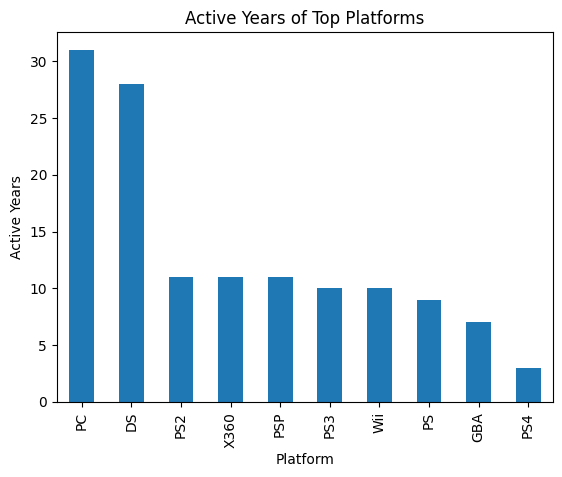

In [48]:
# Calcular el primer y último año de ventas para cada plataforma
platform_lifespan_copy = df_games_copy.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifespan_copy['duration'] = platform_lifespan_copy['max'] - platform_lifespan_copy['min']

# Mostrar la duración de vida de cada plataforma
print("Active duration of each platform (in years):\n", platform_lifespan_copy.sort_values(by='duration', ascending=False))

# Visualización de la duración activa de las plataformas principales
platform_lifespan_copy.loc[top_platforms].sort_values(by='duration', ascending=False).plot(kind='bar', y='duration', legend=False)
plt.xlabel('Platform')
plt.ylabel('Active Years')
plt.title('Active Years of Top Platforms')
plt.show()

Estas son las plataformas que indica los años que se mantuvieron vigentes.

In [49]:
print(type(platform_sales_copy))  # Debería ser <class 'pandas.core.frame.DataFrame'>
print(type(platform_lifespan_copy))  # Debería ser <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [50]:
platform_sales_copy = platform_sales_copy.to_frame()  # Si platform_sales_copy es una Series

In [51]:
df_copy_merged = platform_sales_copy.merge(platform_lifespan_copy, left_index=True, right_index=True)
print(df_copy_merged)

          total_sales     min     max  duration
platform                                       
PS2           1233.56  2000.0  2011.0      11.0
X360           961.24  2005.0  2016.0      11.0
PS3            931.34  2006.0  2016.0      10.0
Wii            891.18  2006.0  2016.0      10.0
DS             802.78  1985.0  2013.0      28.0
PS             727.58  1994.0  2003.0       9.0
PS4            314.14  2013.0  2016.0       3.0
GBA            312.88  2000.0  2007.0       7.0
PSP            289.53  2004.0  2015.0      11.0
3DS            257.81  2011.0  2016.0       5.0
PC             255.76  1985.0  2016.0      31.0
GB             254.43  1988.0  2001.0      13.0
XB             251.57  2000.0  2008.0       8.0
NES            251.05  1983.0  1994.0      11.0
N64            218.01  1996.0  2002.0       6.0
SNES           200.04  1990.0  1999.0       9.0
GC             196.73  2001.0  2007.0       6.0
XOne           159.32  2013.0  2016.0       3.0
2600            86.48  1980.0  1989.0   

Estas son todas las plataformas con ventas acumuladas y los años que se mantuvieron vigentes en el mercado. Realizo un merge() para poder determinar el periodo de datos que considero relevantes para los siguientes analisis.

In [52]:
# Filtrar todos las plataformas que se encuentran vigentes al 2016 y calcular el promedio de vigencia de las mismas
print(df_copy_merged[df_copy_merged['max'] == 2016]['duration'].mean())

9.11111111111111


Se determina que el periodo de datos a utilizar es desde el 2008 hasta el 2016 que coincide con el año que se lanzo la mayor cantidad de videojuegos para construir un modelo para el 2017 tomando en cuenta que el promedio de las plataformas que se encuentran vigentes es de 9 años.

In [53]:
# Filtrar el DataFrame para que solo incluya las filas donde 'year_of_release' es 2008 o mayor
df_games_copy_filtered = df_games_copy[df_games_copy['year_of_release'] >= 2008]
df_games_copy_filtered

name platform  \
2                                         Mario Kart Wii      Wii   
3                                      Wii Sports Resort      Wii   
8                              New Super Mario Bros. Wii      Wii   
14                                    Kinect Adventures!     X360   
15                                          Wii Fit Plus      Wii   
16                                    Grand Theft Auto V      PS3   
23                                    Grand Theft Auto V     X360   
27                           Pokemon Black/Pokemon White       DS   
29                        Call of Duty: Modern Warfare 3     X360   
31                             Call of Duty: Black Ops 3      PS4   
32                               Call of Duty: Black Ops     X360   
33                                   Pokemon X/Pokemon Y      3DS   
34                            Call of Duty: Black Ops II      PS3   
35                            Call of Duty: Black Ops II     X360   
36                        Call of Duty: Modern Warfare 2     X360   
37                        Call of Duty: Modern Warfare 3      PS3   
39                               Super Smash Bros. Brawl      Wii   
40                                          Mario Kart 7      3DS   
41                               Call of Duty: Black Ops      PS3   
42                                    Grand Theft Auto V      PS4   
46                  Pokemon HeartGold/Pokemon SoulSilver       DS   
47             Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS   
51                                   Grand Theft Auto IV     X360   
53                                   Super Mario 3D Land      3DS   
54                                        Gran Turismo 5      PS3   
55                        Call of Duty: Modern Warfare 2      PS3   
57                                   Grand Theft Auto IV      PS3   
60                                  Call of Duty: Ghosts     X360   
61                                          Just Dance 3      Wii   
62                               New Super Mario Bros. 2      3DS   
64                                           Halo: Reach     X360   
66                                                Halo 4     X360   
68                                          Just Dance 2      Wii   
69                                  Call of Duty: Ghosts      PS3   
72                                             Minecraft     X360   
73                             Animal Crossing: New Leaf      3DS   
75                           The Elder Scrolls V: Skyrim     X360   
77                                               FIFA 16      PS4   
79                                             Wii Party      Wii   
81                                        FIFA Soccer 13      PS3   
83                       Pokemon Black 2/Pokemon White 2       DS   
85                                            The Sims 3       PC   
87                          Star Wars Battlefront (2015)      PS4   
90                              Pokémon Platinum Version       DS   
92                        Call of Duty: Advanced Warfare      PS4   
94                                               FIFA 17      PS4   
96                   Super Smash Bros. for Wii U and 3DS      3DS   
97                                  Super Mario Galaxy 2      Wii   
99                             Call of Duty: Black Ops 3     XOne   
100                           Call of Duty: World at War     X360   
101                                        Battlefield 3     X360   
103                                           Just Dance      Wii   
104                                        Battlefield 3      PS3   
105                                            Fallout 4      PS4   
108                                     Pokemon Sun/Moon      3DS   
110                                         Mario Kart 8     WiiU   
116                                         Just Dance 4      Wii   
117                                       Gears of

nTotal Sales by Platforms:
platform
PS3     837.19
X360    805.96
Wii     601.26
DS      388.60
PS4     314.14
3DS     257.81
XOne    159.32
PC      151.29
PSP     136.38
PS2      86.39
WiiU     82.19
PSV      53.81
XB        0.18
DC        0.04
Name: total_sales, dtype: float64


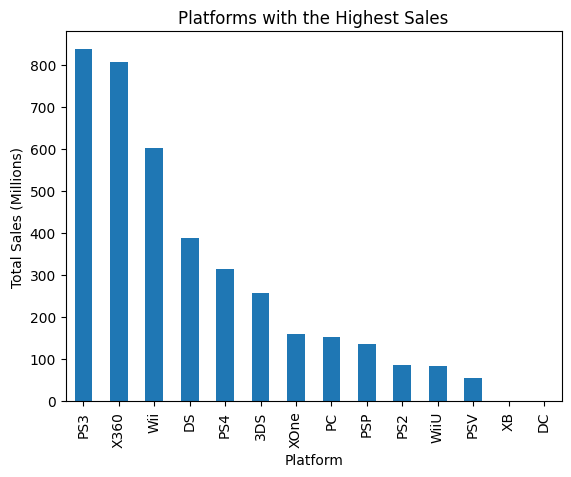

In [54]:
platform_sales_filtered = df_games_copy_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print("nTotal Sales by Platforms:")
print(platform_sales_filtered)  # Imprime las plataformas con mayores ventas

# Visualización de las plataformas con mayores ventas
platform_sales_filtered.plot(kind='bar', y='total_sales ', legend=False)
plt.xlabel('Platform')
plt.ylabel('Total Sales (Millions)')
plt.title('Platforms with the Highest Sales')
plt.show()

Estas son las plataformas que son lideres en ventas 

In [55]:
# Analizar la tendencia de crecimiento o reduccion
platform_yearly_sales_copy = df_games_copy_filtered.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack()
platform_yearly_sales_copy.fillna(0, inplace=True)
print("\nGrowth Trend in Sales by Platforms:")
print(platform_yearly_sales_copy)

# Crear gráfico de líneas para visualizar las ventas anuales por plataforma
platform_yearly_sales_copy.T.plot(kind='line', figsize=(12, 6))
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (Millions)')
plt.title('Annual Sales Distribution for Platforms')
plt.legend(title='Platform')
plt.show()


Growth Trend in Sales by Platforms:
year_of_release  2008.0  2009.0  2010.0  2011.0  2012.0  2013.0  2014.0  \
platform                                                                  
3DS                0.00    0.00    0.00   63.20   51.36   56.57   43.76   
DC                 0.04    0.00    0.00    0.00    0.00    0.00    0.00   
DS               145.31  119.54   85.02   26.18   11.01    1.54    0.00   
PC                12.42   16.91   24.28   35.03   23.22   12.38   13.28   
PS2               53.90   26.40    5.64    0.45    0.00    0.00    0.00   
PS3              118.52  130.93  142.17  156.78  107.36  113.25   47.76   
PS4                0.00    0.00    0.00    0.00    0.00   25.99  100.00   
PSP               34.55   37.78   35.04   17.82    7.69    3.14    0.24   
PSV                0.00    0.00    0.00    4.63   16.19   10.59   11.90   
Wii              171.32  206.97  127.95   59.65   21.71    8.59    3.75   
WiiU               0.00    0.00    0.00    0.00   17.56   21.65

In [56]:
# Calcular el porcentaje de cambio año con año para cada plataforma
platform_growth_copy = platform_yearly_sales_copy.pct_change(axis='columns').iloc[:, -1]  # Último año de cambio
print("\nGrowing Platforms:")
print(platform_growth_copy.sort_values(ascending=False).head())  # Plataformas en crecimiento

print("\nPlatforms in Decline:")
print(platform_growth_copy.sort_values(ascending=True).head())   # Plataformas en declive


Growing Platforms:
platform
PSV    -0.320000
PC     -0.383803
PS4    -0.417578
3DS    -0.455004
XOne   -0.565181
Name: 2016.0, dtype: float64

Platforms in Decline:
platform
PSP    -1.000000
X360   -0.872910
Wii    -0.842105
PS3    -0.785969
WiiU   -0.718654
Name: 2016.0, dtype: float64


Estas son las plataformas que crecen y que decrecen en ventas 

In [57]:
# Seleccionar plataformas con altas ventas totales y crecimiento positivo en el último año
top_platforms_copy = platform_sales_copy.head(10).index  # Plataformas líderes en ventas totales
growing_platforms_copy = platform_growth_copy[platform_growth_copy > 0].index  # Plataformas con crecimiento positivo

# Plataformas que son líderes y están en crecimiento
profitable_platforms_copy = top_platforms_copy.intersection(growing_platforms_copy)
print("Potentially profitable platforms", profitable_platforms_copy)

Potentially profitable platforms Index([], dtype='object', name='platform')


En este analisiss se puede observar que todas las plataformas decrecen con relacion al ultimo año sin embargo hay una tendencia que se puede identificar en PS3 y PS4 que desde el año de su lanzamiento se mantienen en crecimiento durante 4 años y luego comienzan a decrecer por lo que potencialmente se podria pensar en un PS5 como una plataforma potencialmente rentable, el mismo comportamiento se puede observar en XONE que desde su lanzamiento se mantiene durante 3 años en crecimiento y luego comienza a decrecer por lo que una actualizacion de XONE tambien podria ser una plataforma potencilmente rentable. La plataforma 3DS se podria tambien considerar como potencialmente rentable con un comportamiento diferente a las otras mencionadas ya que en el año de su lanzamiento tiene un crecimiento exponencial y durante los siguientes tres años tiene un decrecimiento con un repunte leves. 
Se concluye que una atualizacion de PS4 y XONE como plataformas que tienen un periodo mas largo de vigencia con crecimiento constante en ventas ( 4-3 años respectivamente) y un relanzamiento de 3DS que tiene un decrecimiento del 10% despues de 3 años. 

In [58]:
# Configurar el tamaño de la figura para que el gráfico sea más claro
plt.figure(figsize=(14, 8))

# Crear el diagrama de caja para las ventas totales desglosadas por plataforma
sns.boxplot(data=df_games_copy_filtered, x='platform', y='total_sales')

# Etiquetas y título del gráfico
plt.xlabel('Platform')
plt.ylabel('Total Sales (Millions)')
plt.title('Total Sales Distribution by Platform')

# Mostrar el gráfico
plt.show()

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

En las plataformas que se determinaron como potencialmente rentables PS4, XONE, 3DS se observa lo descrito anteriormente ya que las dos primeras tienen ventas promedio similares y valores atipicos que si tiene una diferencia, esto se puede deber a que existio un videojuego en especifico que en PS4 tuvo ventas muy altas y para 3DS sus ventas promedio estan por debajo de las otras dos plataformas sin embargo sus valores atipicos es el mismo razonamiento se pudo deber a un videojuego especifico que presento ventas muy altas casi iguales a las de PS4. Para las demas plataformas las ventas promedio de X360 y PS3 tienen ventas similares a PS4 y XONE pero con valores atipicos mas altos para lo que aplica el mismo razonamiento ya explicdo. El resto de plataformas presentan ventas promedio y valores atipicos mas bajos con excepcion de WII que presenta los valores atipicos mas altos de todas las plataformas y debe corresponder a un videojuego que tuvo un gran nivel de ventas que tuvo que ser durante su lanzamiento.

In [59]:
# Filtrar los datos para la plataforma elegida 'PS4'
platform_data_filtered = df_games_copy_filtered[(df_games_copy_filtered['platform'] == 'PS4') & 
                         df_games_copy_filtered['user_score'].notna() & df_games_copy_filtered['critic_score'].notna()]

# Gráfico de dispersión para la reseña de usuarios y ventas
plt.figure(figsize=(12, 6))
sns.scatterplot(data=platform_data_filtered, x='user_score', y='total_sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (Millions)')
plt.title('User Score vs Total Sales for PS4')
plt.show()

# Gráfico de dispersión para la reseña de críticos y ventas
plt.figure(figsize=(12, 6))
sns.scatterplot(data=platform_data_filtered, x='critic_score', y='total_sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (Millions)')
plt.title('Critic Score vs Total Sales for PS4')
plt.show()

# Calcular la correlación entre las reseñas y las ventas
correlation_user_sales_filtered = platform_data_filtered['user_score'].corr(platform_data_filtered['total_sales'])
correlation_critic_sales_filtered = platform_data_filtered['critic_score'].corr(platform_data_filtered['total_sales'])

print(f"Correlation between User Score and Total Sales for PS4: {correlation_user_sales_filtered:.2f}")
print(f"Correlation between Critic Score and Total Sales for PS4: {correlation_critic_sales_filtered:.2f}")

Correlation between User Score and Total Sales for PS4: 0.01
Correlation between Critic Score and Total Sales for PS4: 0.34


<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el análisis de la relación estre las scores y las ventas. 
</div>

En la plataforma analizada PS4 se puede determinar que para user_score la correlacion con las ventas es casi nula y esto se puede atribuir a que seguramente lo que mas influye en la decision de compra es la publicidad y el conocimiento de la plataforma (marca) que ya se encuentra posicionada y la calificacion de critic_score es mas alta pero no se puede concluir que es determinante para un aumento de las ventas sin embargo si se puede considerar que en videojuegos especificos una calificacion alta por criticos reconocidos (lideres de opinion o influencers) puede dar un mayor impulso en las ventas como se puede ver en los graficos.

In [60]:
# Seleccionar los juegos de la plataforma de interés y los mismos juegos en otras plataformas
platform_interest_filtered = 'PS4'
df_ps4_games_filtered = df_games_copy_filtered[df_games_copy_filtered['platform'] == platform_interest_filtered]
game_titles_filtered = df_ps4_games_filtered['name'].unique()  # Títulos de juegos en la plataforma de interés
print("\nPS4 Games List:")
print(game_titles_filtered)


PS4 Games List:
['Call of Duty: Black Ops 3' 'Grand Theft Auto V' 'FIFA 16'
 'Star Wars Battlefront (2015)' 'Call of Duty: Advanced Warfare' 'FIFA 17'
 'Fallout 4' 'FIFA 15' 'Destiny' "Uncharted 4: A Thief's End"
 'The Last of Us' 'Uncharted: The Nathan Drake Collection'
 'Call of Duty: Infinite Warfare' 'Minecraft' 'Battlefield 1' 'Watch Dogs'
 'Far Cry 4' 'The Witcher 3: Wild Hunt' "Assassin's Creed: Unity"
 'Batman: Arkham Knight' 'NBA 2K16' 'Call of Duty: Ghosts'
 "Tom Clancy's The Division" 'Battlefield 4'
 'Metal Gear Solid V: The Phantom Pain' "Assassin's Creed Syndicate"
 'Madden NFL 16' 'FIFA 14' 'Middle-Earth: Shadow of Mordor'
 "Assassin's Creed IV: Black Flag" 'inFAMOUS: Second Son'
 'Mortal Kombat X' 'Killzone: Shadow Fall' 'Bloodborne' 'NBA 2K15'
 'Need for Speed (2015)' 'Far Cry: Primal'
 "Tom Clancy's Rainbow Six: Siege" 'Madden NFL 15' 'Overwatch'
 'Battlefield: Hardline' 'Dying Light' 'DriveClub'
 'Dragon Age: Inquisition' 'Need for Speed Rivals'
 'Destiny: The Taken

Esta es la lista de todos los juegos de la plataforma PS4 para poder seleccionar al azar los que se van a incluir en el siguiente grafico

In [61]:
# Listar los juegos de interés
selected_games_filtered = ['Street Fighter V', 'FIFA 17', 'Minecraft', 'Call of Duty: Ghosts', 
                  'LEGO Marvel Super Heroes', 'Disney Infinity 3.0']

# Filtrar el DataFrame para incluir solo los juegos seleccionados
df_selected_games_filtered = df_games_copy_filtered[df_games_copy_filtered['name'].isin(selected_games_filtered)]
print("\nSales of Selected Games:")
print(df_selected_games_filtered)

# Crear el gráfico de barras para comparar ventas por plataforma para estos juegos específicos
plt.figure(figsize=(14, 8))
sns.barplot(data=df_selected_games_filtered, x='name', y='total_sales', hue='platform')
plt.xticks(rotation=45, ha='right')  # Ajuste de rotación para mayor legibilidad
plt.xlabel('Game Title')
plt.ylabel('Total Sales (Millions)')
plt.title('Comparison of Sales for Selected Games Across Platforms')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')  # Colocar la leyenda fuera del gráfico
plt.tight_layout()  # Ajustar el diseño para que no se superponga
plt.show()


Sales of Selected Games:
                           name platform  year_of_release     genre  na_sales  \
60         Call of Duty: Ghosts     X360           2013.0   Shooter      6.73   
69         Call of Duty: Ghosts      PS3           2013.0   Shooter      4.10   
72                    Minecraft     X360           2013.0      Misc      5.70   
94                      FIFA 17      PS4           2016.0    Sports      0.66   
180                   Minecraft      PS3           2014.0      Misc      2.03   
261                   Minecraft      PS4           2014.0      Misc      1.48   
323        Call of Duty: Ghosts      PS4           2013.0   Shooter      1.78   
493        Call of Duty: Ghosts     XOne           2013.0   Shooter      1.88   
543                   Minecraft     XOne           2014.0      Misc      1.61   
571                     FIFA 17     XOne           2016.0    Sports      0.43   
730    LEGO Marvel Super Heroes     X360           2013.0    Action      1.24   
86

Los videojuegos analizados en diferentes plataformas que se seleccionaron al azar tratando de que seamn varios generos para ver su comportamiento ratifica la tendencia que se identifico anteriormente pues las plataformas con mayores ventas son PS3, PS4, X360 y XONE y particularmente el orden de las prefrencia se invierte en FIFA 17 que puede deberse a que pudo ser el lanzamiento. Claro que para entender porque las ventas en estos juegos son mayores en X360 y PS3 corresponde a que registran ventas en los 9 años que es el total periodo analizado y PS4 y XONE registran ventas solo en los ultimos 4 años del periodo analizado. 

\Total Sales by Genre:
           genre  total_sales  count
0         Action       945.74   1988
8        Shooter       608.19    583
10        Sports       560.34    958
7   Role-Playing       421.57    783
3           Misc       396.43    994
6         Racing       226.41    403
4       Platform       195.38    244
9     Simulation       150.78    459
2       Fighting       148.51    308
1      Adventure       105.86    869
11      Strategy        59.73    284
5         Puzzle        55.62    257



Profitability by Genre:
           genre  unit_profitability
8        Shooter            1.043208
4       Platform            0.800738
10        Sports            0.584906
6         Racing            0.561811
7   Role-Playing            0.538404
2       Fighting            0.482175
0         Action            0.475724
3           Misc            0.398823
9     Simulation            0.328497
5         Puzzle            0.216420
11      Strategy            0.210317
1      Adventure            0.121818


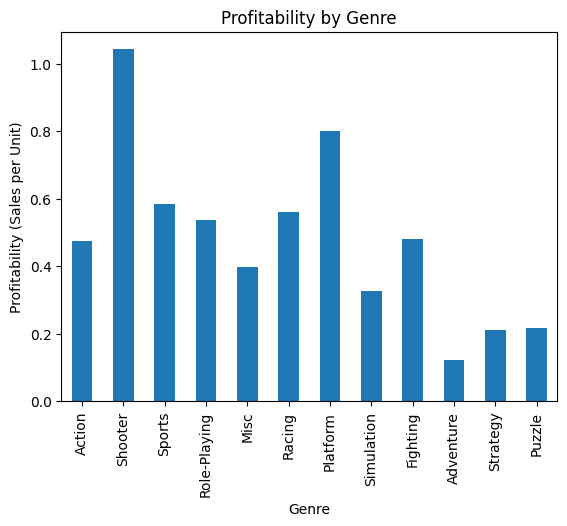


Top 3 platforms in the Shooter Genre:
platform
X360    222.68
PS3     170.86
PS4      88.56
Name: total_sales, dtype: float64

Top 3 videogames in the Shooter Genre:
name
Call of Duty: Modern Warfare 3    30.6
Call of Duty: Black Ops II        29.4
Call of Duty: Black Ops           29.2
Name: total_sales, dtype: float64


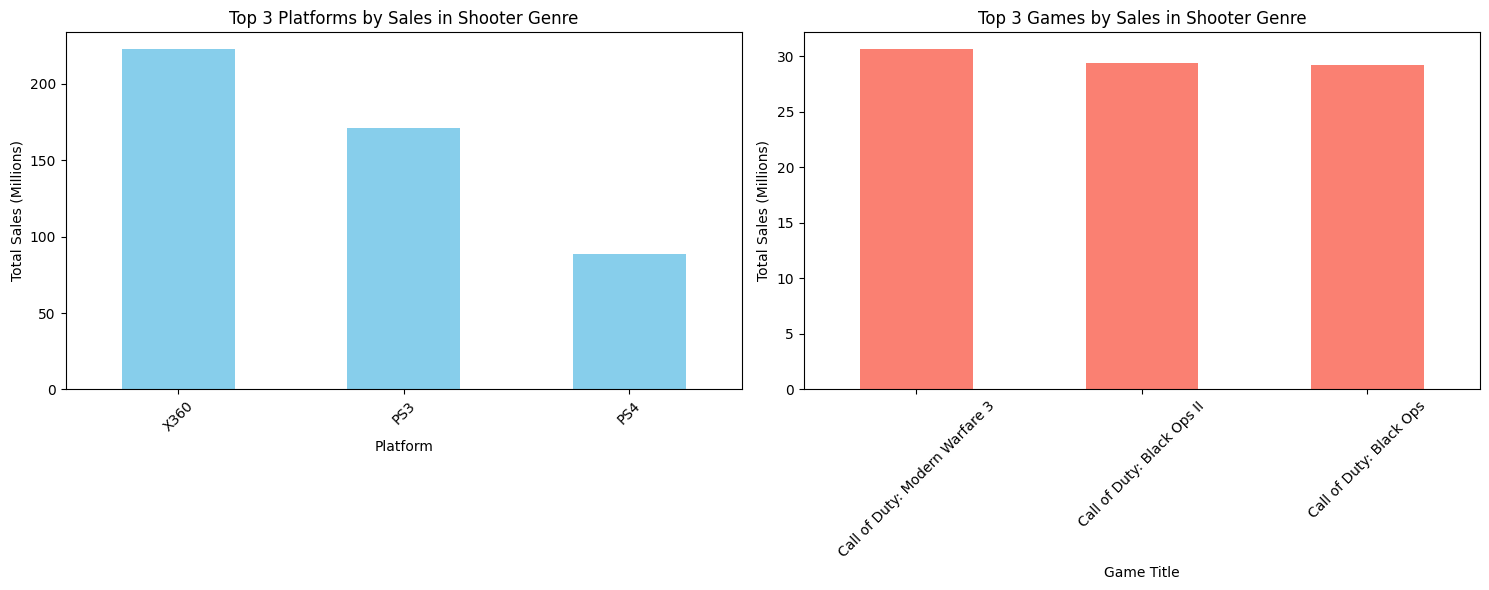


Top 3 platforms in the Action Genre:
platform
PS3     280.04
X360    215.82
PS4      96.10
Name: total_sales, dtype: float64

Top 3 videogames in the Action Genre:
name
Grand Theft Auto V     56.58
Grand Theft Auto IV    22.37
FIFA Soccer 13         15.97
Name: total_sales, dtype: float64


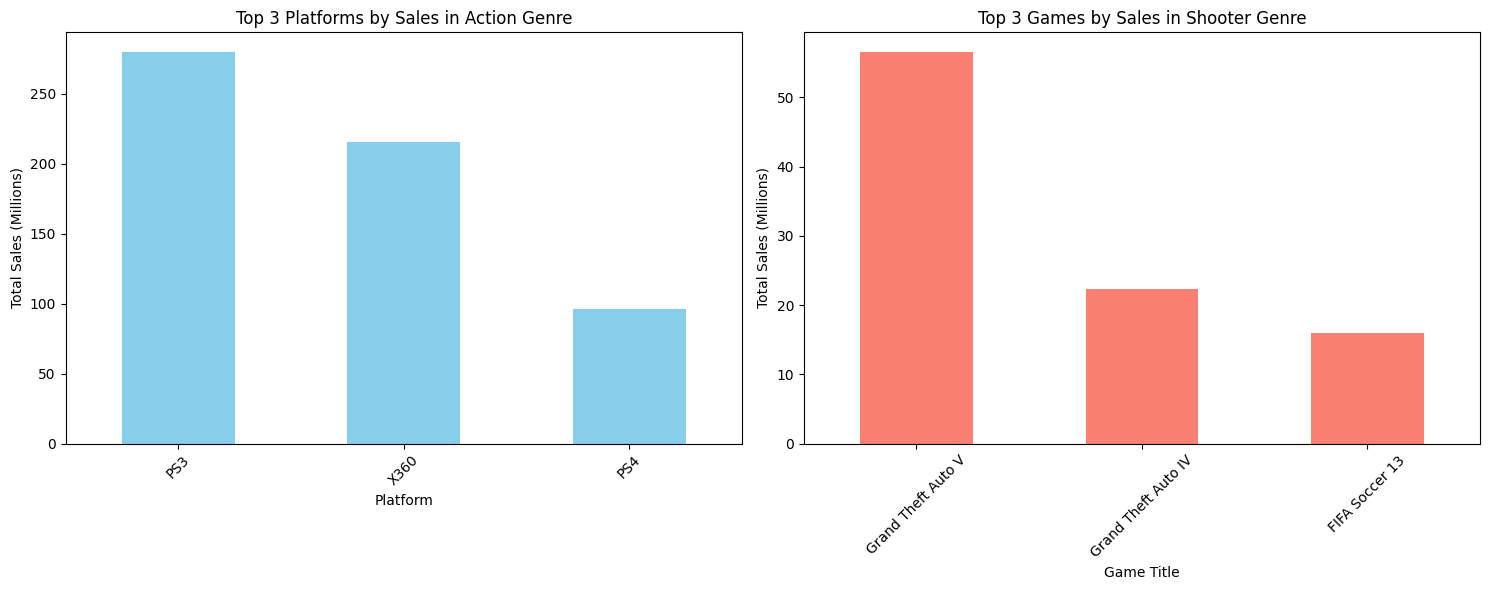

Top 3 platforms in the Sports Genre:
platform
Wii     157.41
PS3     119.26
X360    114.75
Name: total_sales, dtype: float64

Top 3 videogames in the Sports Genre:
name
Wii Sports Resort    32.77
Wii Fit Plus         21.80
FIFA 15              17.37
Name: total_sales, dtype: float64


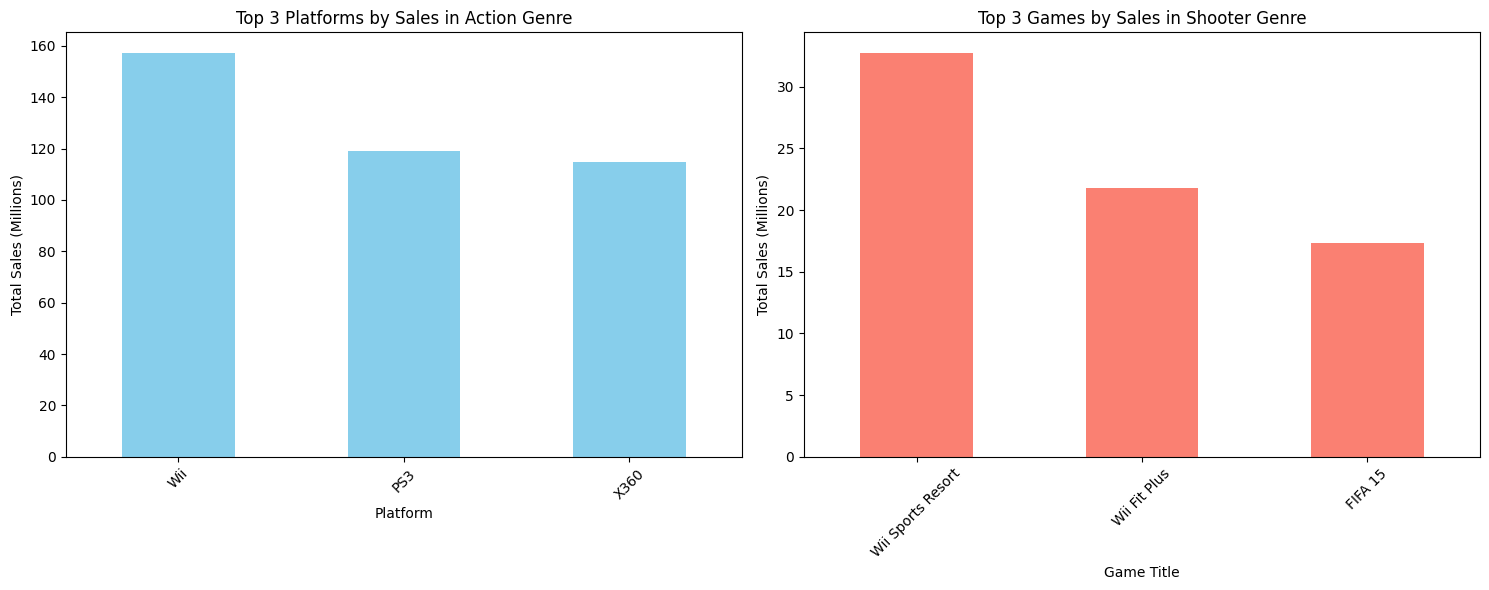

In [62]:
# Agrupar los datos por género para calcular el número de juegos y las ventas totales por género
genre_sales_filtered = df_games_copy_filtered.groupby('genre').agg(total_sales=('total_sales', 'sum'), # Suma de ventas totales por género
                       count=('name', 'count')).reset_index() # Cantidad de juegos en cada género

# Ordenar los géneros por ventas totales para una mejor visualización
genre_sales_filtered = genre_sales_filtered.sort_values(by='total_sales', ascending=False)
print("\Total Sales by Genre:")
print(genre_sales_filtered)

# Crear un gráfico de barras con las ventas totales y la cantidad de juegos por género
fig, ax1 = plt.subplots(figsize=(14, 8))

# Gráfico de barras para ventas totales
sns.barplot(data=genre_sales_filtered, x='genre', y='total_sales', ax=ax1, color='skyblue', label='Total Sales (Millions)')
ax1.set_ylabel('Total Sales (Millions)')
ax1.set_xlabel('Genre')
plt.xticks(rotation=45, ha='right')

# Crear un segundo eje Y para la cantidad de juegos
ax2 = ax1.twinx()
sns.lineplot(data=genre_sales_filtered, x='genre', y='count', ax=ax2, color='red', marker='o', label='Number of Games')
ax2.set_ylabel('Number of Games')

# Añadir leyenda y título
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
plt.title('Distribution and Profitability of Games by Genre')
plt.show()

# Añadir la columna de rentabilidad por unidad al DataFrame `genre_sales_filtered`
genre_sales_filtered['unit_profitability'] = genre_sales_filtered['total_sales'] / genre_sales_filtered['count']

# Verificar el resultado
print("\nProfitability by Genre:")
print(genre_sales_filtered[['genre', 'unit_profitability']].sort_values(by='unit_profitability', ascending=False))

# Visualización de las plataformas con mayores ventas
genre_sales_filtered.plot(kind='bar', x='genre', y='unit_profitability', legend=False)
plt.xlabel('Genre')
plt.ylabel('Profitability (Sales per Unit)')
plt.title('Profitability by Genre')
plt.show()

# Filtrar el DataFrame para incluir solo juegos del género Shooter
shooter_games_filtered = df_games_copy_filtered[df_games_copy_filtered['genre'] == 'Shooter']

# Obtener las tres plataformas con mayores ventas en el género Shooter
top_shooter_platforms = (
    shooter_games_filtered.groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(3)
)
print("\nTop 3 platforms in the Shooter Genre:")
print(top_shooter_platforms)

# Obtener los tres juegos con mayores ventas en el género Shooter
top_shooter_games = (
    shooter_games_filtered.groupby('name')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(3)
)
print("\nTop 3 videogames in the Shooter Genre:")
print(top_shooter_games)

# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras para las plataformas más vendidas
top_shooter_platforms.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Top 3 Platforms by Sales in Shooter Genre')
axes[0].set_xlabel('Platform')
axes[0].set_ylabel('Total Sales (Millions)')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de barras para los videojuegos más vendidos
top_shooter_games.plot(kind='bar', color='salmon', ax=axes[1])
axes[1].set_title('Top 3 Games by Sales in Shooter Genre')
axes[1].set_xlabel('Game Title')
axes[1].set_ylabel('Total Sales (Millions)')
axes[1].tick_params(axis='x', rotation=45)

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()

# Filtrar el DataFrame para incluir solo juegos del género Action
action_games_filtered = df_games_copy_filtered[df_games_copy_filtered['genre'] == 'Action']

# Obtener las tres plataformas con mayores ventas en el género Action
top_action_platforms = (
    action_games_filtered.groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(3)
)
print("\nTop 3 platforms in the Action Genre:")
print(top_action_platforms)

# Obtener los tres juegos con mayores ventas en el género Action
top_action_games = (
    action_games_filtered.groupby('name')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(3)
)
print("\nTop 3 videogames in the Action Genre:")
print(top_action_games)

# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras para las plataformas más vendidas
top_action_platforms.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Top 3 Platforms by Sales in Action Genre')
axes[0].set_xlabel('Platform')
axes[0].set_ylabel('Total Sales (Millions)')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de barras para los videojuegos más vendidos
top_action_games.plot(kind='bar', color='salmon', ax=axes[1])
axes[1].set_title('Top 3 Games by Sales in Shooter Genre')
axes[1].set_xlabel('Game Title')
axes[1].set_ylabel('Total Sales (Millions)')
axes[1].tick_params(axis='x', rotation=45)

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()

# Filtrar el DataFrame para incluir solo juegos del género Action
sports_games_filtered = df_games_copy_filtered[df_games_copy_filtered['genre'] == 'Sports']

# Obtener las tres plataformas con mayores ventas en el género Action
top_sports_platforms = (
    sports_games_filtered.groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(3)
)
print("Top 3 platforms in the Sports Genre:")
print(top_sports_platforms)

# Obtener los tres juegos con mayores ventas en el género Action
top_sports_games = (
    sports_games_filtered.groupby('name')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(3)
)
print("\nTop 3 videogames in the Sports Genre:")
print(top_sports_games)

# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras para las plataformas más vendidas
top_sports_platforms.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Top 3 Platforms by Sales in Action Genre')
axes[0].set_xlabel('Platform')
axes[0].set_ylabel('Total Sales (Millions)')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de barras para los videojuegos más vendidos
top_sports_games.plot(kind='bar', color='salmon', ax=axes[1])
axes[1].set_title('Top 3 Games by Sales in Shooter Genre')
axes[1].set_xlabel('Game Title')
axes[1].set_ylabel('Total Sales (Millions)')
axes[1].tick_params(axis='x', rotation=45)

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()

En estos generos se puede comprobar con la rentabilidad unitaria para cada genero cual es el mas rentable (El numero de videosjuegos vendidos no se refiere a la totalidad de unidades sino al numero de veces que aparece el videojuego en las diferentes plataformas) siendo asi no se puede generalizar que los generos que mas ventas tienen son los mas rentables como es el caso de Action, Sports y Role_Playing y se incluye los graficos de las plataformas y videojuegos para tres generos en los que se puede ratificar las conclusiones de preguntas anteriores.

# PASO 4


Total Sales by Platform in each Region:
          na_sales  eu_sales  jp_sales
platform                              
3DS          82.65     61.27    100.62
DC            0.00      0.00      0.04
DS          198.73     86.13     76.12
PC           41.07     92.17      0.00
PS2          32.91     14.24      8.47
PS3         349.13    293.73     74.11
PS4         108.74    141.09     15.96
PSP          34.04     26.21     60.46
PSV          12.47     13.07     21.84
Wii         332.87    170.74     47.01
WiiU         38.10     25.13     13.01
X360        490.69    234.88      9.30
XB            0.13      0.04      0.00
XOne         93.12     51.59      0.34

Top 5 Platforms in each Region:
platform
X360    490.69
PS3     349.13
Wii     332.87
DS      198.73
PS4     108.74
Name: na_sales, dtype: float64
platform
PS3     293.73
X360    234.88
Wii     170.74
PS4     141.09
PC       92.17
Name: eu_sales, dtype: float64
platform
3DS    100.62
DS      76.12
PS3     74.11
PSP     60.46
Wii    

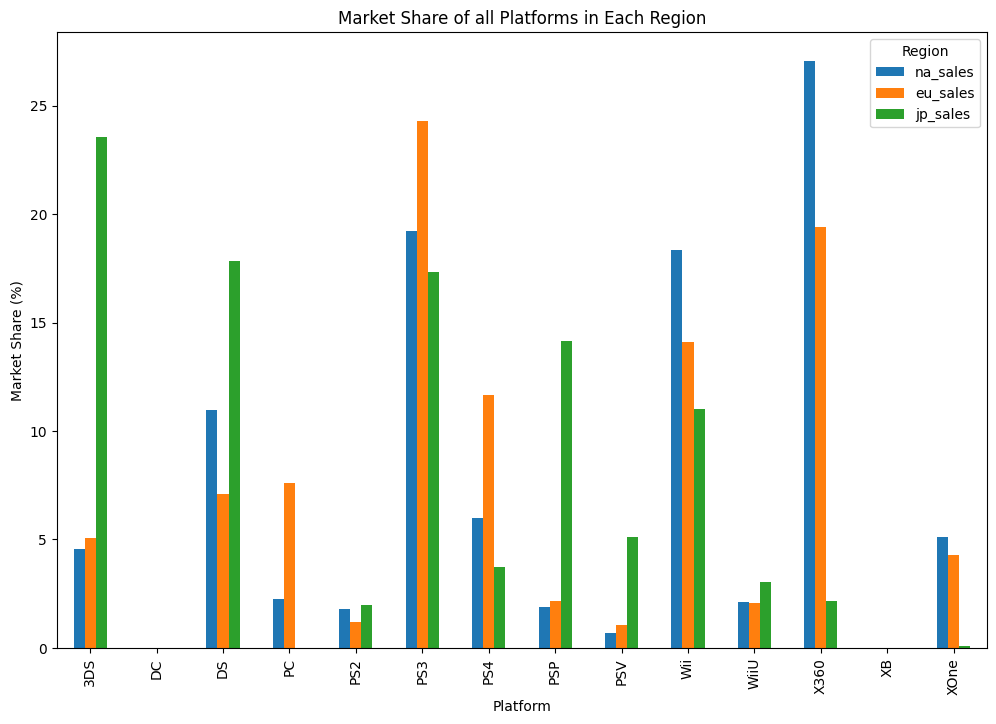


Market Share of all Platforms in Each Region:
           na_sales   eu_sales   jp_sales
platform                                 
3DS        4.554597   5.062423  23.548961
DC         0.000000   0.000000   0.009362
DS        10.951423   7.116476  17.815016
PC         2.263246   7.615530   0.000000
PS2        1.813573   1.176578   1.982307
PS3       19.239523  24.269390  17.344598
PS4        5.992340  11.657537   3.735256
PSP        1.875844   2.165597  14.149972
PSV        0.687185   1.079906   5.111402
Wii       18.343482  14.107363  11.002153
WiiU       2.099578   2.076362   3.044842
X360      27.040476  19.406919   2.176559
XB         0.007164   0.003305   0.000000
XOne       5.131568   4.262615   0.079573


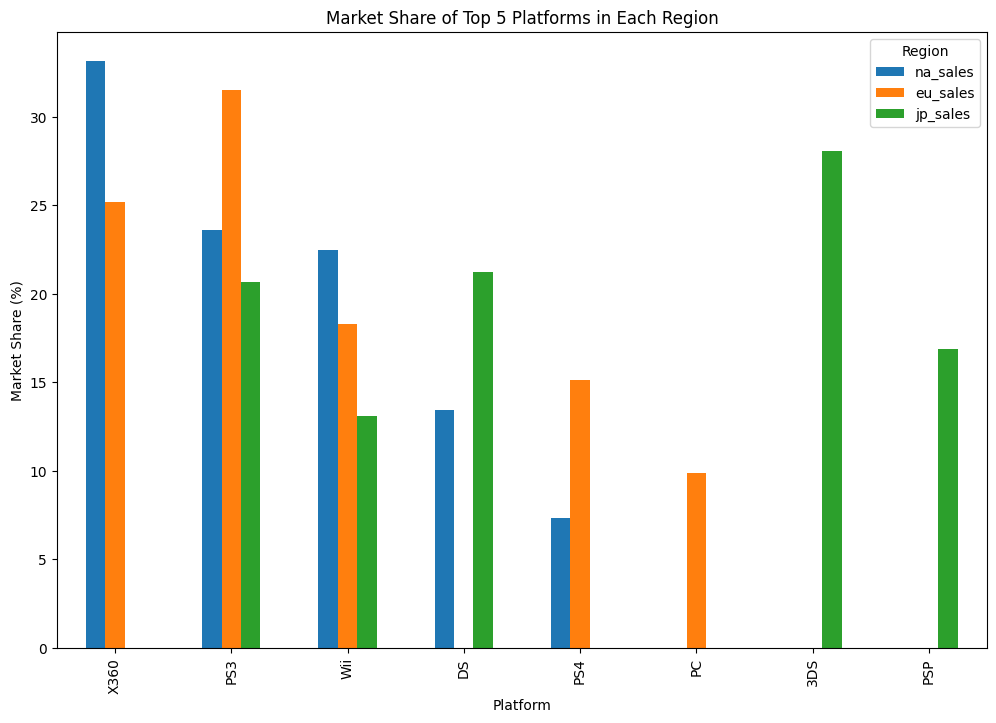


Market Share of Top 5 Platforms in Each Region:
           na_sales   eu_sales   jp_sales
platform                                 
X360      33.151146  25.185233   0.000000
PS3       23.587315  31.495480  20.682630
Wii       22.488785  18.307760  13.119558
DS        13.426251   0.000000  21.243581
PS4        7.346503  15.128510   0.000000
PC         0.000000   9.883016   0.000000
3DS        0.000000   0.000000  28.081045
PSP        0.000000   0.000000  16.873186


In [63]:
# Calcular las ventas totales por plataforma en cada región
platform_sales_by_region_filtered = df_games_copy_filtered.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
print("\nTotal Sales by Platform in each Region:")
print(platform_sales_by_region_filtered)

# Obtener las cinco plataformas principales en cada región
top_platforms_na = platform_sales_by_region_filtered['na_sales'].nlargest(5)
top_platforms_eu = platform_sales_by_region_filtered['eu_sales'].nlargest(5)
top_platforms_jp = platform_sales_by_region_filtered['jp_sales'].nlargest(5)

print("\nTop 5 Platforms in each Region:")
print(top_platforms_na)
print(top_platforms_eu)
print(top_platforms_jp)

# Concatenar los tres DataFrames por el índice
df_all_top_platforms = pd.concat([top_platforms_na, top_platforms_eu, top_platforms_jp], axis=1).fillna(0)

# Mostrar el resultado
print("\nTop 5 Platforms in each Region:")
print(df_all_top_platforms)

# Calcular las cuotas de mercado por región para todas las plataformas
market_share_all_platforms = platform_sales_by_region_filtered.div(platform_sales_by_region_filtered.sum(axis=0), axis=1) * 100

# Visualización de cuotas de mercado en cada región para todas las plataformas 
market_share_all_platforms.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Platform')
plt.ylabel('Market Share (%)')
plt.title('Market Share of all Platforms in Each Region')
plt.legend(title='Region')
plt.show()

# Imprimir cuotas de mercado para observación detallada
print("\nMarket Share of all Platforms in Each Region:")
print(market_share_all_platforms)

# Calcular las cuotas de mercado por región para las principales plataformas
market_share_all_top_platforms = df_all_top_platforms.div(df_all_top_platforms.sum(axis=0), axis=1) * 100

# Visualización de cuotas de mercado en cada región para las plataformas principales
market_share_all_top_platforms.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Platform')
plt.ylabel('Market Share (%)')
plt.title('Market Share of Top 5 Platforms in Each Region')
plt.legend(title='Region')
plt.show()

# Imprimir cuotas de mercado para observación detallada
print("\nMarket Share of Top 5 Platforms in Each Region:")
print(market_share_all_top_platforms)


Total Sales Genre by Region:
              na_sales  eu_sales  jp_sales
genre                                     
Action          433.74    310.59     90.16
Adventure        43.52     29.87     23.36
Fighting         74.61     34.73     23.06
Misc            211.61    107.00     37.33
Platform         92.33     60.20     23.01
Puzzle           28.21     17.02      5.97
Racing           94.29     91.62     11.39
Role-Playing    155.81     94.46    138.12
Shooter         311.26    208.35     15.93
Simulation       70.36     49.80     17.91
Sports          276.27    185.19     30.69
Strategy         22.64     21.46     10.35

Top 5 Genres in each Region:
genre
Action          433.74
Shooter         311.26
Sports          276.27
Misc            211.61
Role-Playing    155.81
Name: na_sales, dtype: float64
genre
Action          310.59
Shooter         208.35
Sports          185.19
Misc            107.00
Role-Playing     94.46
Name: eu_sales, dtype: float64
genre
Role-Playing    138.12
Actio

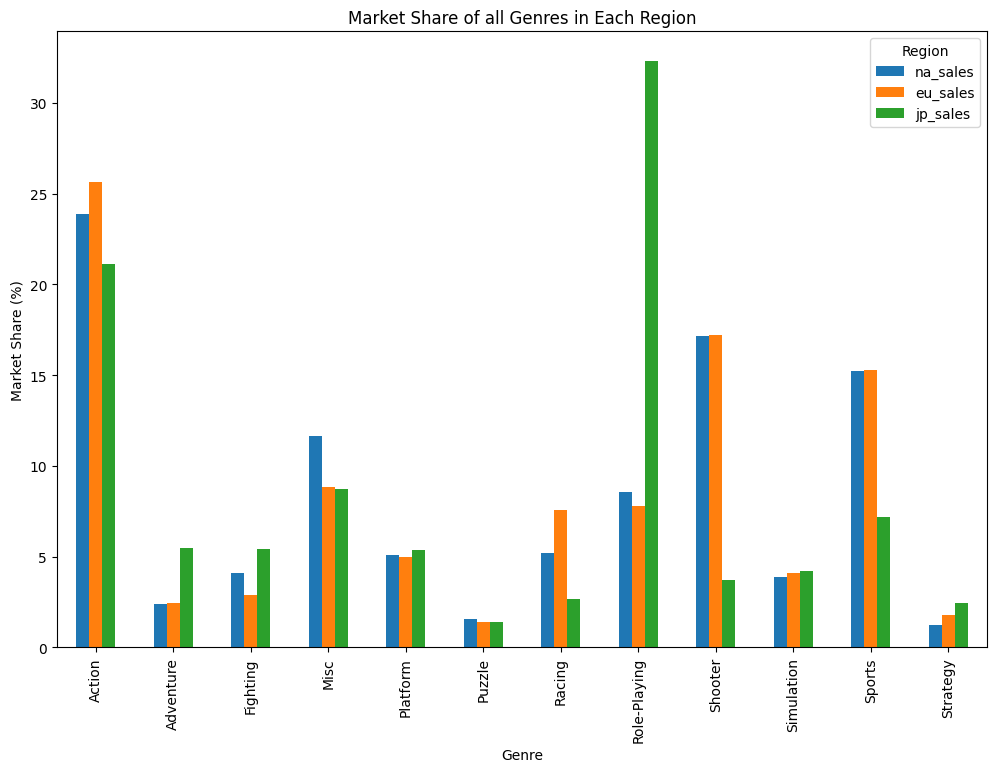

\Market Share of all Genres in Each Region:
               na_sales   eu_sales   jp_sales
genre                                        
Action        23.902130  25.662445  21.100917
Adventure      2.398259   2.468004   5.467141
Fighting       4.111537   2.869560   5.396929
Misc          11.661202   8.840856   8.736660
Platform       5.088034   4.974014   5.385227
Puzzle         1.554570   1.406275   1.397210
Racing         5.196043   7.570087   2.665699
Role-Playing   8.586229   7.804741  32.325407
Shooter       17.152619  17.214882   3.728234
Simulation     3.877332   4.114716   4.191631
Sports        15.224423  15.301291   7.182644
Strategy       1.247624   1.773129   2.422299


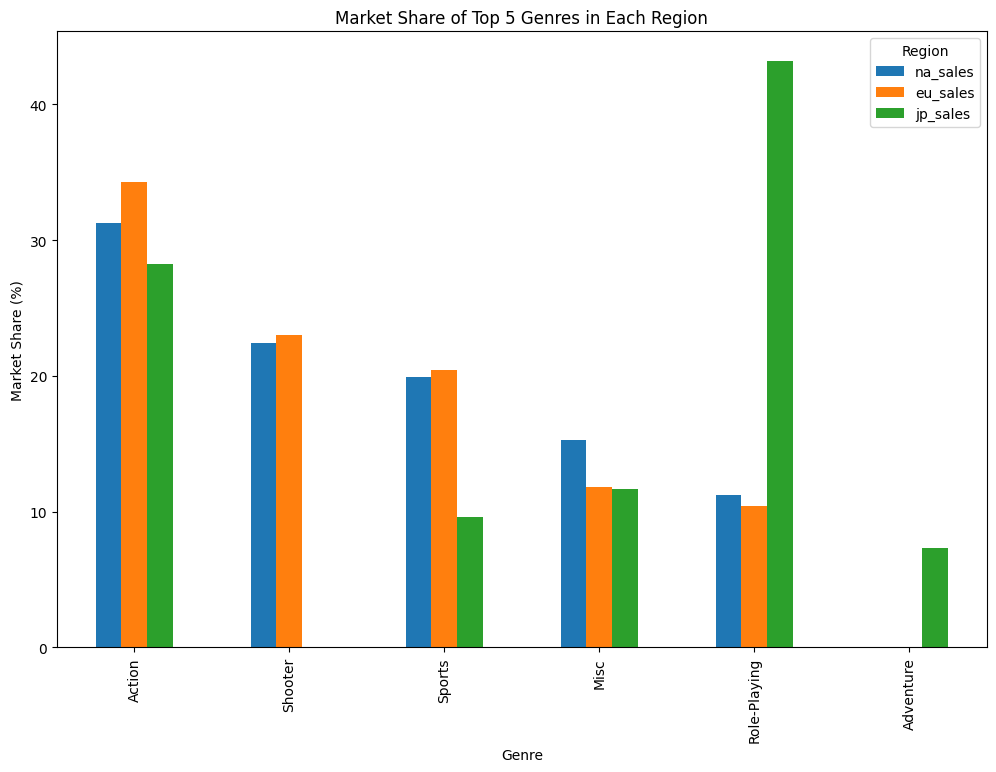

\Market Share of Top 5 Genres in Each Region:
               na_sales   eu_sales   jp_sales
genre                                        
Action        31.233753  34.296978  28.204968
Shooter       22.413930  23.007100   0.000000
Sports        19.894289  20.449652   9.600826
Misc          15.238102  11.815501  11.678033
Role-Playing  11.219927  10.430769  43.208409
Adventure      0.000000   0.000000   7.307764


In [64]:
# Calcular las ventas totales por genero en cada región
genre_sales_by_region_filtered = df_games_copy_filtered.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
print("\nTotal Sales Genre by Region:")
print(genre_sales_by_region_filtered)

# Obtener los cinco generos principales en cada región
top_genres_na = genre_sales_by_region_filtered['na_sales'].nlargest(5)
top_genres_eu = genre_sales_by_region_filtered['eu_sales'].nlargest(5)
top_genres_jp = genre_sales_by_region_filtered['jp_sales'].nlargest(5)

print("\nTop 5 Genres in each Region:")
print(top_genres_na)
print(top_genres_eu)
print(top_genres_jp)

# Concatenar los tres DataFrames por el índice
df_all_top_genres = pd.concat([top_genres_na, top_genres_eu, top_genres_jp], axis=1).fillna(0)

# Mostrar el resultado
print("\nTop 5 Genres in each Region:")
print(df_all_top_genres)

# Calcular las cuotas de mercado por región para todos los generos
market_share_all_genres = genre_sales_by_region_filtered.div(genre_sales_by_region_filtered.sum(axis=0), axis=1) * 100

# Visualización de cuotas de mercado en cada región para todos los generos 
market_share_all_genres.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Genre')
plt.ylabel('Market Share (%)')
plt.title('Market Share of all Genres in Each Region')
plt.legend(title='Region')
plt.show()

# Imprimir cuotas de mercado para observación detallada
print("\Market Share of all Genres in Each Region:")
print(market_share_all_genres)

# Calcular las cuotas de mercado por región para los principales generos
market_share_all_top_genres = df_all_top_genres.div(df_all_top_genres.sum(axis=0), axis=1) * 100

# Visualización de cuotas de mercado en cada región para los principales generos
market_share_all_top_genres.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Genre')
plt.ylabel('Market Share (%)')
plt.title('Market Share of Top 5 Genres in Each Region')
plt.legend(title='Region')
plt.show()

# Imprimir cuotas de mercado para observación detallada
print("\Market Share of Top 5 Genres in Each Region:")
print(market_share_all_top_genres)

Estos graficos muestran la participacion de mercado para cada plataforma y genero en funcion del total de ventas de cada region. Vamos a profundizar en la plataforma PS4 que tiene ventas en las tres regiones con una participacion del 5,99%, 11,65%, 3,73% respectivamente pero si vemos dentro de las 5 plataformas con mayor participacion solo aparece en NA y EU con el 7,34% y 15,12% respectivamente pero no esta dentro de las 5 primeras plataformas en JP por lo que tiene 0% de participacion lo que demuestra que al ser muy popular en NA y EU no lo es en JP. Lo mismo sucede con el genero SHOOTER que registra ventas en las tres regiones pero no esta dentro de los 5 generos mas populares en JP y por tanto tiene 0% de participacion entre los 5 generos mas vendidos dentro de JP. 


Market Share Shooter by Platform in each Region:
           na_sales   eu_sales   jp_sales
platform                                 
3DS        0.199190   0.158387   1.255493
DS         1.063420   0.211183   0.251099
PC         2.727623   7.775378   0.000000
PS2        0.440147   0.206383   0.502197
PS3       23.456274  30.813535  51.537979
PS4       10.492836  18.795296  17.639674
PSP        0.408019   0.484761   1.506591
PSV        0.475487   0.715143   1.506591
Wii        3.530810   1.737461   0.816070
WiiU       0.751783   0.839933   9.667294
X360      44.612221  29.719222  14.312618
XOne      11.842190   8.543317   1.004394


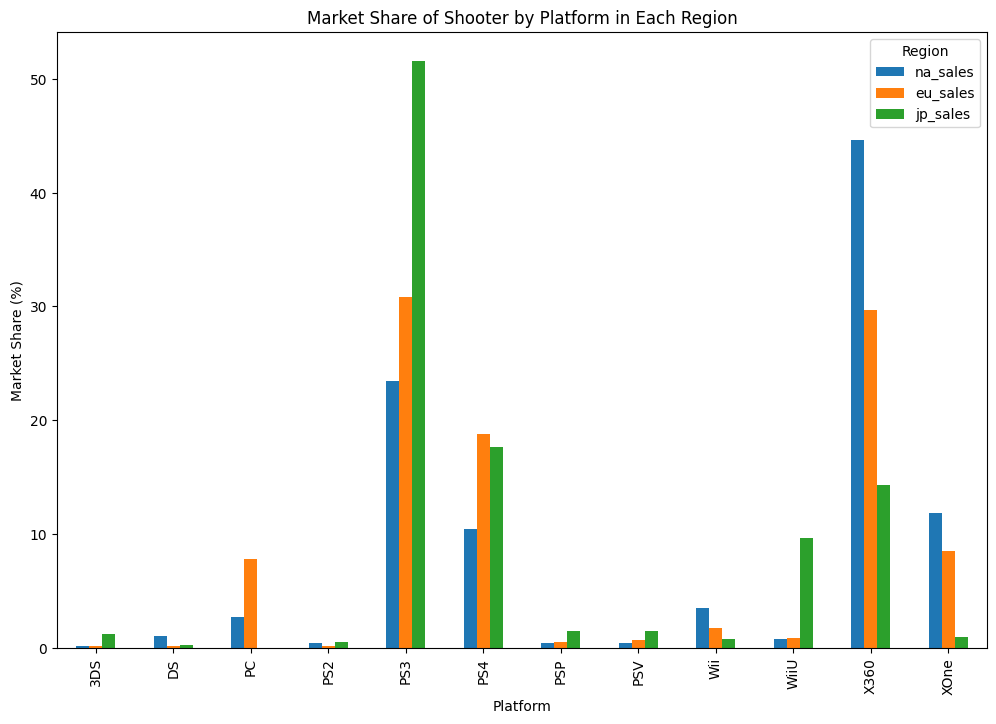

In [65]:
# Filtrar el género Shooter
shooter_sales = df_games_copy_filtered[df_games_copy_filtered["genre"] == "Shooter"]

# Sumar ventas por plataforma y región
shooter_platform_sales_by_region = shooter_sales.groupby("platform")[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Calcular la participación de mercado
market_share_shooter = shooter_platform_sales_by_region.div(shooter_platform_sales_by_region.sum(axis=0), axis=1) * 100

# Mostrar los resultados
print("\nMarket Share Shooter by Platform in each Region:")
print(market_share_shooter)

# Visualización de cuotas de mercado en cada región para los principales generos
market_share_shooter.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Platform')
plt.ylabel('Market Share (%)')
plt.title('Market Share of Shooter by Platform in Each Region')
plt.legend(title='Region')
plt.show()

En este grafico se puede comprobar que a pesar de que el genero SHOOTER egistra ventas no esta entre los 5 mas populares en JP sin embargo PS4 es la segunda plataforma mas popular para jugar este genero lo cual ratifica las conclusiones anteriores.

In [66]:
# Crear perfiles por región y clasificaciones de ESRB
def create_region_profile(region_column):
    return df_games_copy_filtered.groupby("rating")[region_column].mean()

# Perfiles para cada región
profile_NA = create_region_profile("na_sales")
profile_EU = create_region_profile("eu_sales")
profile_JP = create_region_profile("jp_sales")

# Mostrar los resultados
print("Perfil de usuario para la región NA (promedio de ventas por clasificación ESRB):")
print(profile_NA)

print("\nPerfil de usuario para la región EU (promedio de ventas por clasificación ESRB):")
print(profile_EU)

print("\nPerfil de usuario para la región JP (promedio de ventas por clasificación ESRB):")
print(profile_JP)

Perfil de usuario para la región NA (promedio de ventas por clasificación ESRB):
rating
E          0.294531
E10+       0.257020
EC         0.220000
M          0.538692
RP         0.000000
T          0.222768
Unknown    0.072235
Name: na_sales, dtype: float64

Perfil de usuario para la región EU (promedio de ventas por clasificación ESRB):
rating
E          0.179161
E10+       0.147480
EC         0.000000
M          0.388692
RP         0.030000
T          0.137753
Unknown    0.062430
Name: eu_sales, dtype: float64

Perfil de usuario para la región JP (promedio de ventas por clasificación ESRB):
rating
E          0.042331
E10+       0.026194
EC         0.000000
M          0.042154
RP         0.000000
T          0.047364
Unknown    0.072926
Name: jp_sales, dtype: float64


Estos son los promedios de ventas para cada categoria de RATING en cada region.

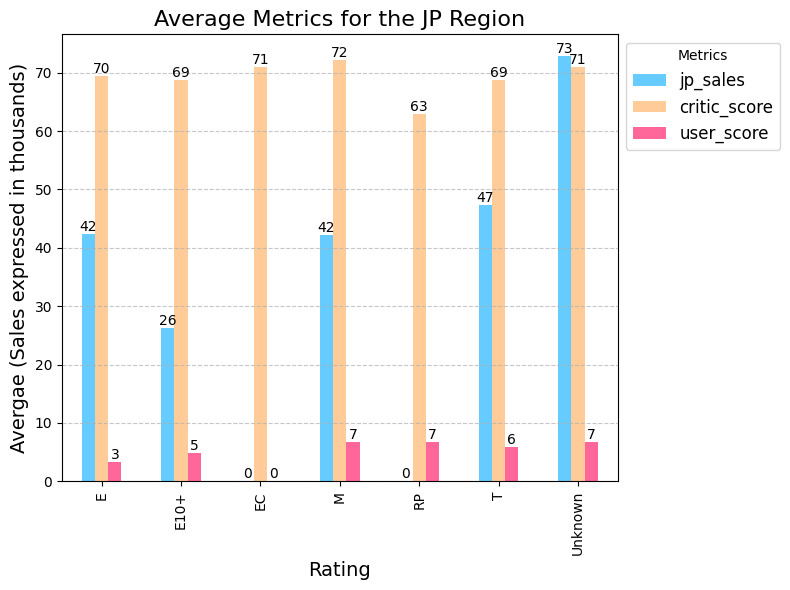

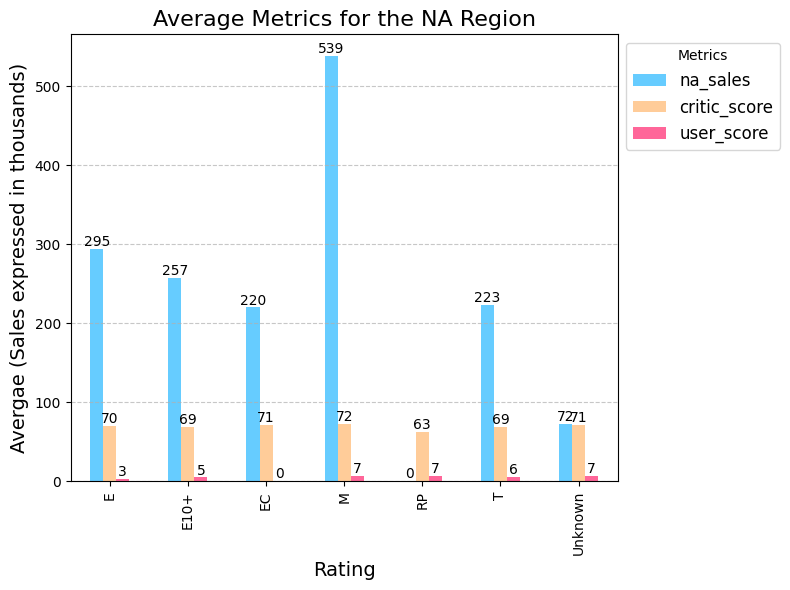

In [67]:
# Agrupar los datos por 'rating'
data = df_games_copy_filtered.groupby('rating')

# Datos promedios para la región JP
mean_values_jp = data[['jp_sales', 'critic_score', 'user_score']].mean()

# Escalar las ventas multiplicándolas por 1000 para hacerlas más legibles
mean_values_jp['jp_sales'] = mean_values_jp['jp_sales'] * 1000  # Multiplicamos por 1000

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar las métricas para la región JP
mean_values_jp.plot(kind='bar', ax=ax, color=['#66ccff', '#ffcc99', '#ff6699'])

# Configuración del título y las etiquetas
ax.set_title('Average Metrics for the JP Region', fontsize=16)
ax.set_xlabel('Rating', fontsize=14)
ax.set_ylabel('Avergae (Sales expressed in thousands)', fontsize=14)

# Añadir etiquetas en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5),  # 5 puntos por encima de la barra
                textcoords='offset points', 
                ha='center', va='center')

# Añadir una rejilla para ayudar a la lectura
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Mover la leyenda fuera del gráfico
ax.legend(title='Metrics', loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Datos promedios para la región NA
mean_values_na = data[['na_sales', 'critic_score', 'user_score']].mean()

# Escalar las ventas multiplicándolas por 1000 para hacerlas más legibles
mean_values_na['na_sales'] = mean_values_na['na_sales'] * 1000  # Multiplicamos por 1000

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar las métricas para la región JP
mean_values_na.plot(kind='bar', ax=ax, color=['#66ccff', '#ffcc99', '#ff6699'])

# Configuración del título y las etiquetas
ax.set_title('Average Metrics for the NA Region', fontsize=16)
ax.set_xlabel('Rating', fontsize=14)
ax.set_ylabel('Avergae (Sales expressed in thousands)', fontsize=14)

# Añadir etiquetas en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5),  # 5 puntos por encima de la barra
                textcoords='offset points', 
                ha='center', va='center')

# Añadir una rejilla para ayudar a la lectura
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Mover la leyenda fuera del gráfico
ax.legend(title='Metrics', loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Datos promedios para la región EU
mean_values_eu = data[['eu_sales', 'critic_score', 'user_score']].mean()

# Escalar las ventas multiplicándolas por 1000 para hacerlas más legibles
mean_values_eu['eu_sales'] = mean_values_eu['eu_sales'] * 1000  # Multiplicamos por 1000

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar las métricas para la región JP
mean_values_eu.plot(kind='bar', ax=ax, color=['#66ccff', '#ffcc99', '#ff6699'])

# Configuración del título y las etiquetas
ax.set_title('Average Metrics for the EU Region', fontsize=16)
ax.set_xlabel('Rating', fontsize=14)
ax.set_ylabel('Avergae (Sales expressed in thousands)', fontsize=14)

# Añadir etiquetas en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5),  # 5 puntos por encima de la barra
                textcoords='offset points', 
                ha='center', va='center')

# Añadir una rejilla para ayudar a la lectura
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Mover la leyenda fuera del gráfico
ax.legend(title='Metrics', loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente trabajo con el análisis por región para hacer un zoom de los resultadso

En estos graficos se puede observar claramente que las calificaciones de usuarios y criticos en menor medida no influyen en las ventas pues hay categorias que tienen ventas altas y calificciones bajas o al contrario como sucede en la categoria E en JP que tiene calificaciones altas de usuariosy ventas bajas, tambien se puede apreciar este comportamiento en la categria E y E10+ de EU que tiene calificacion baja de criticos y tiene ventas altas.

In [68]:
user_score_xone = df_games_copy_filtered[df_games_copy_filtered['platform'] == 'XOne']['user_score']
print('\n User score for XOne:\n', user_score_xone.head())

user_score_pc = df_games_copy_filtered[df_games_copy_filtered['platform'] == 'PC']['user_score']
print('\nUser Score for PC:\n', user_score_pc.head())

def comparar_varianzas(user_score_xone, user_score_pc):
    """
    Realiza una prueba de Levene para comparar varianzas y retorna la decisión sobre igual varianza.
    """
    
    # Calcular varianzas
    var_user_score_xone = user_score_xone.var()
    var_user_score_pc = user_score_pc.var()
    
    # Prueba de Levene
    stat, p_value = levene(user_score_xone, user_score_pc)
    
    print(f"Variance of Xone: {var_user_score_xone}")
    print(f"Variance of PC: {var_user_score_pc}")
    print(f"Levene-test - Estadístico: {stat}, p-valor: {p_value}")
    
    # Decisión basada en el p-valor
    if p_value < 0.05:
        print("Las varianzas no son iguales (p < 0.05). Usar equal_var=False.")
        equal_var = False
    else:
        print("Las varianzas son iguales (p >= 0.05). Usar equal_var=True.")
        equal_var = True
    
    return equal_var

# Llamada a la función para comparar varianzas
equal_var = comparar_varianzas(user_score_xone, user_score_pc)

# Ahora puedes usar el resultado en un test adicional, como t-test:

# Ejecutar t-test
t_stat, t_p_value = ttest_ind(user_score_xone, user_score_pc, equal_var=equal_var)

print(f"T-test - Estadístico: {t_stat}, p-valor: {t_p_value}")

# Interpretación
alpha = 0.05  # Nivel de significancia
if t_p_value < alpha:
    print("Rechazamos la hipótesis nula: las calificaciones promedio son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia suficiente para decir que las calificaciones promedio son diferentes.")


 User score for XOne:
 99     6.9
165    7.9
179    5.4
242    6.4
270    6.2
Name: user_score, dtype: float64

User Score for PC:
 85     7.6
192    4.0
218    8.2
313    8.1
458    3.9
Name: user_score, dtype: float64
Variance of Xone: 3.292980481221816
Variance of PC: 4.551571499741763
Levene-test - Estadístico: 5.180905891711503, p-valor: 0.0230687701458867
Las varianzas no son iguales (p < 0.05). Usar equal_var=False.
T-test - Estadístico: -0.04556022929092449, p-valor: 0.9636784546453082
No se puede rechazar la hipótesis nula: no hay evidencia suficiente para decir que las calificaciones promedio son diferentes.


In [69]:
user_score_action = df_games_copy_filtered[df_games_copy_filtered['genre'] == 'Action']['user_score']
print('\n User score for Action:\n', user_score_action.head())

user_score_sports = df_games_copy_filtered[df_games_copy_filtered['genre'] == 'Sports']['user_score']
print('\nUser Score for Sports:\n', user_score_sports.head())

def comparar_varianzas_genre(user_score_action, user_score_sports):
    """
    Realiza una prueba de Levene para comparar varianzas y retorna la decisión sobre igual varianza.
    """
    
    # Calcular varianzas
    var_user_score_action = user_score_action.var()
    var_user_score_sports = user_score_sports.var()
    
    # Prueba de Levene
    stat, p_value = levene(user_score_action, user_score_sports)
    
    print(f"Variance of Action: {var_user_score_action}")
    print(f"Variance of Sports: {var_user_score_sports}")
    print(f"Levene-test - Estadístico: {stat}, p-valor: {p_value}")
    
    # Decisión basada en el p-valor
    if p_value < 0.05:
        print("Las varianzas no son iguales (p < 0.05). Usar equal_var=False.")
        equal_var = False
    else:
        print("Las varianzas son iguales (p >= 0.05). Usar equal_var=True.")
        equal_var = True
    
    return equal_var

# Llamada a la función para comparar varianzas
equal_var = comparar_varianzas(user_score_action, user_score_sports)

# Ahora puedes usar el resultado en un test adicional, como t-test:

# Ejecutar t-test
t_stat, t_p_value = ttest_ind(user_score_action, user_score_sports, equal_var=equal_var)

print(f"T-test - Estadístico: {t_stat}, p-valor: {t_p_value}")

# Interpretación
alpha = 0.05  # Nivel de significancia
if t_p_value < alpha:
    print("Rechazamos la hipótesis nula: las calificaciones promedio son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia suficiente para decir que las calificaciones promedio son diferentes.")


 User score for Action:
 16    8.2
23    8.1
42    8.3
46    6.9
51    7.9
Name: user_score, dtype: float64

User Score for Sports:
 3      8.0
15     7.4
77     4.3
94     5.0
119    0.0
Name: user_score, dtype: float64
Variance of Xone: 5.610434957505477
Variance of PC: 8.830118389277558
Levene-test - Estadístico: 107.32267145456402, p-valor: 1.0006741492714957e-24
Las varianzas no son iguales (p < 0.05). Usar equal_var=False.
T-test - Estadístico: 10.201182061850904, p-valor: 1.0634467286363435e-23
Rechazamos la hipótesis nula: las calificaciones promedio son diferentes.


Se usó una prueba de levene y t de dos muestras independientes porque queremos comparar las medias de dos generos diferentes (Action y Sports) para determinar si son significativamente distintas.De igual manera se hizo para comparar las medias de dos plataformas (XOne y PC) para determinar si son significativamente distintas. En conclusion se puede decir que las calificaciones de las plataformas XOne y Pc son parecidas y las diferencias encontradas que podrian ser en los extremos de cada plataforma o en una situacion especifica corresponde al azar y no a un comportamiento que nos permita concluir que sus calificaciones si son distintas. En cambio para los generos Action y Sports sus calificaciones si son distintas y si se nos presentan variaciones en situaciones particulares estas no son producto del azar y si de un comportamiento de calificacion distinta para estos dos generos.Se asigna un alpha de 0.05.


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(user_score_xone, user_score_pc)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene. REALIZO LA PRUEBA DE LEVENE Y CONFIRMO LO QUE OBTUVE CON LA PRUEBA T EN CONCLUSION RATIFICO MI CONCLUSION GENERAL EXPUESTA ANTERIORMENTE.
</div>




<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente trabajo agregando la prueba de levene!

# Conclusion General

Como conclusion general se puede establecer que es conveniente realizar una proyeccion en las plataformas PS4 y X360 que son las que mayor participacion de mercado tienen con la particularidad de que en EU es similar para las dos plataformas, pero para JP el PS4 es lider en participacion y NA tiene la participacion mas baja sin embargo en NA la plataforma X360 es lider y en JP es la mas baja. Si esto se contrsta con el total de ventas se puede ratificar que son las dos plataformas que se deberian proyectar para el 2017 enfocandonos en los generos ROLEPLAYING para JP y ACTION para las tres regiones EU,NA,JP y el genero SHOOTER para EU y NA y el genero SPORTS para las tres regiones pero con una menor participacion para JP. Con esta configuracion es donde mas rentable se podrian proyectar las ventas para el 2017. 